# 🗳️ Lok Sabha Election 2024 Analysis

### Why BJP Lacked in Achieving Majority

This notebook explores and analyzes the 2024 Lok Sabha election results to understand the reasons behind BJP not achieving a majority. The dataset includes detailed information about each constituency, vote counts, and party performance.

## Importing Required Libraries

In [ ]:
# IMPORT LIBRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [ ]:
pd.set_option('display.max_rows',None)

## 📂 Load Dataset

In [ ]:
# IMPORT DATASET
data = pd.read_excel('GE India 2024.xlsx',sheet_name='Final Result',index_col=False)
data.head()

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Victory Margin
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,24396.0
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
4,5,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN


# 🧹 Data Cleaning & Preparation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.N             8902 non-null   int64  
 1   Candidate       8902 non-null   object 
 2   Party           8902 non-null   object 
 3   EVM Votes       8902 non-null   object 
 4   Postal Votes    8902 non-null   object 
 5   Total Votes     8902 non-null   object 
 6   % of Votes      8902 non-null   object 
 7   State           8902 non-null   object 
 8   Constituency    8902 non-null   object 
 9   Victory Margin  542 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 695.6+ KB


In [ ]:
# DROP UNCONTESTED CANDIADATE
data.drop(1737,inplace=True)

In [ ]:
index = data[data['Postal Votes']=='-'].index
data.loc[index,'Postal Votes'] = 0

In [ ]:
# CHANGING DATA TYPES
data['EVM Votes'] = data['EVM Votes'].astype('int32')
data['Postal Votes'] = data['Postal Votes'].astype('int32')
data['Total Votes'] = data['Total Votes'].astype('int32')
data['% of Votes'] = data['% of Votes'].astype('float')

In [ ]:
# DROP S.N COLUMN
data.drop(columns=['S.N'],inplace=True)

In [ ]:
print(data.loc[4184]) # there shiv sena got more 48 votes but victory show for shiv sena (ubt) there may be some typos We need to make correction.
print(data.loc[4183])
data.loc[4184,'Victory Margin'] = 48
data.loc[4183,'Victory Margin'] = 'NaN'

Candidate         RAVINDRA DATTARAM WAIKAR
Party                            Shiv Sena
EVM Votes                           451094
Postal Votes                          1550
Total Votes                         452644
% of Votes                            47.4
State                          Maharashtra
Constituency        Mumbai North West - 27
Victory Margin                         NaN
Name: 4184, dtype: object
Candidate                         AMOL GAJANAN KIRTIKAR
Party             Shiv Sena (Uddhav Balasaheb Thackrey)
EVM Votes                                        451095
Postal Votes                                       1501
Total Votes                                      452596
% of Votes                                         47.4
State                                       Maharashtra
Constituency                     Mumbai North West - 27
Victory Margin                                     48.0
Name: 4183, dtype: object


/tmp/ipython-input-2486947645.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NaN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[4183,'Victory Margin'] = 'NaN'


In [ ]:
# Sort candidates within each constituency by total votes in descending order (winner first)
data = data.groupby(['State','Constituency'],group_keys=False).apply(lambda x : x.sort_values(by='Total Votes',ascending=False))

/tmp/ipython-input-751285815.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby(['State','Constituency'],group_keys=False).apply(lambda x : x.sort_values(by='Total Votes',ascending=False))


# ABOUT DATA

In [ ]:
print(f"Number of Rows in Data : {data.shape[0]}")
print(f"Number of Columns in Data : {data.shape[1]}")
print(f"Number of Duplicate rows in Data : {data.duplicated().sum()}")
print(f"Number Columns with Missing Values : {(data.isnull().sum()>0).sum()} ")

Number of Rows in Data : 8901
Number of Columns in Data : 9
Number of Duplicate rows in Data : 0
Number Columns with Missing Values : 1 


In [ ]:
def abreviation(Name):
  name = Name.split(' ')
  if len(name)<=1:
    return name[0]
  else:
    abr = ''.join([i[0] for i in name])
  return abr

data['PartyAbr'] = data['Party'].apply(abreviation)

## Feature Description :    
1. Candidate : The name of the person who contested the election from a particular constituency.

2. Party :	The political party the candidate belongs to (e.g., BJP, INC, AAP). If they contested independently, it might say "Independent".

3. EVM Votes :	Number of votes the candidate received through Electronic Voting Machines (EVMs) at polling booths. This is the majority vote source.

4. Postal Votes	: Number of votes received through postal ballots — used by government officials, armed forces, or people on election duty.

5. % of Votes :	The percentage of total valid votes in the constituency that the candidate received.

6. State : The state or union territory where the election was held.

7. Constituency	: The specific Lok Sabha seat (region) the candidate contested from. For example: "Amethi", "Varanasi", etc.

8. Victory : Margin	The difference in number of votes between the winning candidate and the runner-up.



# PARTIES

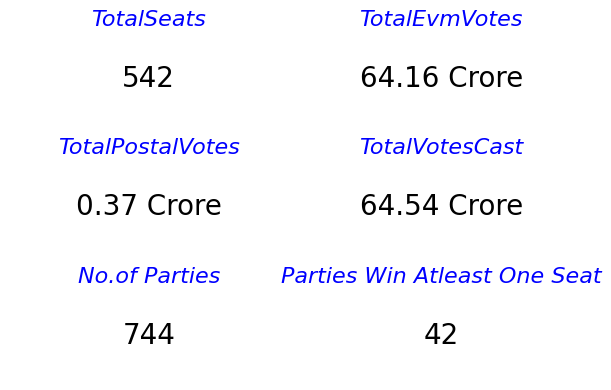

In [ ]:
seats = data['Constituency'].nunique()
evm_votes = round(data['EVM Votes'].sum()/10000000,2)
postal_votes = round(data['Postal Votes'].sum()/10000000,2)
total_votes = round(data['Total Votes'].sum()/10000000,2)
totalparties = data['Party'].nunique() - 2
partieswinatleastoneseat = data.groupby('Constituency')['Party'].head(1).nunique()

figure,ax = plt.subplots(figsize=(6, 4),nrows=3,ncols=2,)
ax[0,0].text(0.5, 0.5, f"{seats}", fontsize=20, ha='center', va='center')
ax[0,0].axis('off')
ax[0,0].set_title("TotalSeats",fontsize=16,color='blue',fontstyle='italic')

ax[0,1].text(0.5, 0.5, f"{evm_votes} Crore", fontsize=20, ha='center', va='center')
ax[0,1].axis('off')
ax[0,1].set_title("TotalEvmVotes", fontsize=16,color='blue',fontstyle='italic')

ax[1,0].text(0.5, 0.5, f"{postal_votes} Crore", fontsize=20, ha='center', va='center')
ax[1,0].axis('off')
ax[1,0].set_title("TotalPostalVotes",fontsize=16,color='blue',fontstyle='italic')

ax[1,1].text(0.5, 0.5, f"{total_votes} Crore", fontsize=20, ha='center', va='center')
ax[1,1].axis('off')
ax[1,1].set_title("TotalVotesCast", fontsize=16,color='blue',fontstyle='italic')

ax[2,0].text(0.5, 0.5, f"{totalparties}", fontsize=20, ha='center', va='center')
ax[2,0].axis('off')
ax[2,0].set_title("No.of Parties", fontsize=16,color='blue',fontstyle='italic')

ax[2,1].text(0.5, 0.5, f"{partieswinatleastoneseat}", fontsize=20, ha='center', va='center')
ax[2,1].axis('off')
ax[2,1].set_title("Parties Win Atleast One Seat", fontsize=16,color='blue',fontstyle='italic')



plt.tight_layout()
plt.show()

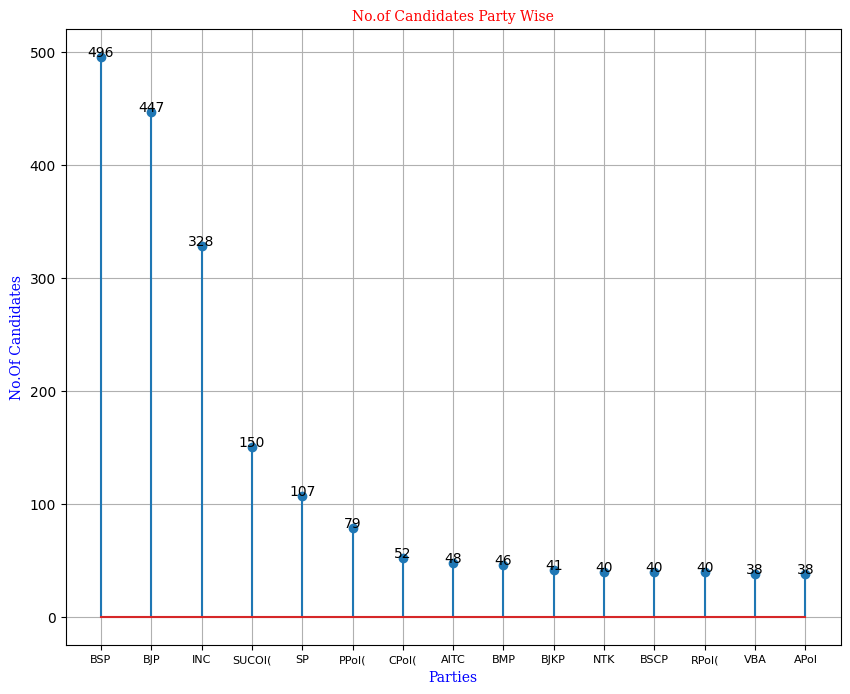

In [ ]:
t10p = data['PartyAbr'].value_counts()[2:17].reset_index().rename(columns={'count': 'Number of Candidates'})
plt.figure(figsize=(10,8))
plt.stem(t10p['PartyAbr'],t10p['Number of Candidates'])
plt.xticks(size=8)
plt.xlabel('Parties',color='blue',font='serif')
plt.ylabel('No.Of Candidates',color='blue',font='serif')
plt.title('No.of Candidates Party Wise',color='red',font='serif')
plt.grid()
for i in range(len(t10p)):
    plt.text(
        i,
        t10p['Number of Candidates'].iloc[i] + 0.5,
        str(t10p['Number of Candidates'].iloc[i]),
        ha='center',
        fontsize=10,
        color='black'
    )
plt.show()

# 🔍 Insights
There are 542 Lok Sabha seats in total.

64.16 crore votes were cast through EVM, while only 0.37 crore were postal votes.

A total of 64.54 crore votes were cast in the 2024 election.

744 parties participated, but most fielded only a few candidates.

Bahujan Samaj Party (BSP) fielded the highest number of candidates (488), followed by BJP (440) and Congress (328).

Many small parties fielded candidates but likely had limited electoral impact.

A total of 42 parties won at least one seat in the 2024 Lok Sabha election.

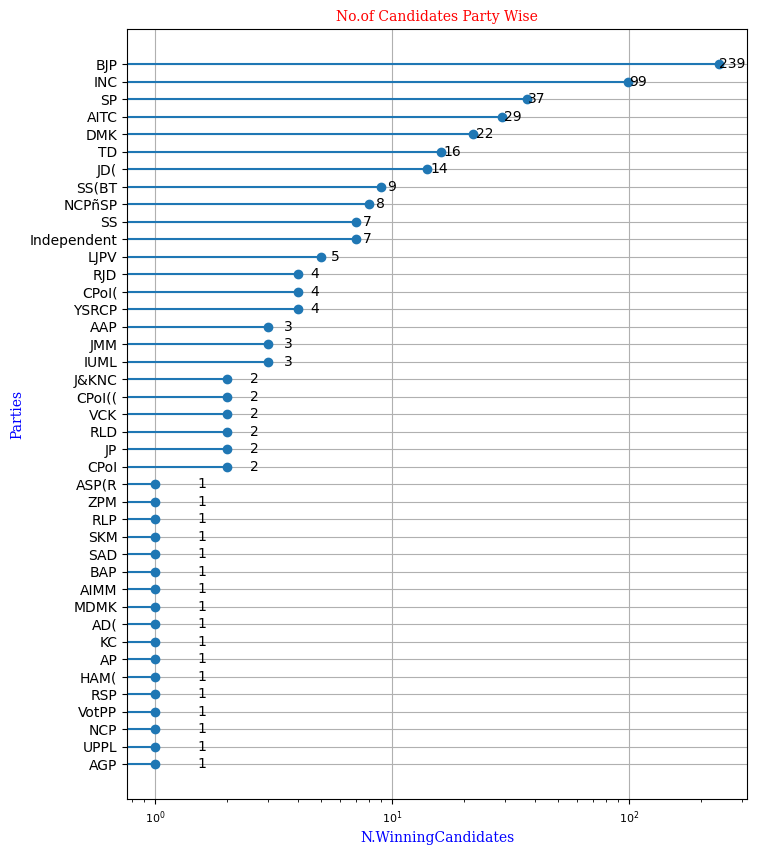

In [ ]:
temp_df = data.groupby('Constituency')['PartyAbr'].head(1).value_counts().reset_index().rename(columns={'count':'N.WinningSeats'}).sort_values('N.WinningSeats')
plt.figure(figsize=(8,10))
plt.stem(temp_df['PartyAbr'],temp_df['N.WinningSeats'],orientation='horizontal',)
plt.xticks(size=8)
plt.xscale('log')
plt.ylabel('Parties',color='blue',font='serif')
plt.xlabel('N.WinningCandidates',color='blue',font='serif')
plt.title('No.of Candidates Party Wise',color='red',font='serif')
plt.grid()
for i in range(len(temp_df)):
    plt.text(
        temp_df['N.WinningSeats'].iloc[i] + 0.5,  # Slight offset for visibility
        i,  # Vertical position
        str(temp_df['N.WinningSeats'].iloc[i]),  # Text: number of seats
        va='center',
        fontsize=10,
        color='black'
    )

# 🔍 Insights

BJP won the most seats: 239, followed by:

Congress: 99 seats

Samajwadi Party: 37 seats

TMC: 29 seats

DMK: 22 seats

These top 5 parties dominated the seat count, showing a significant gap between them and the rest.

Many regional and small parties won only 1 or 2 seats, showing fragmented but localized influence.



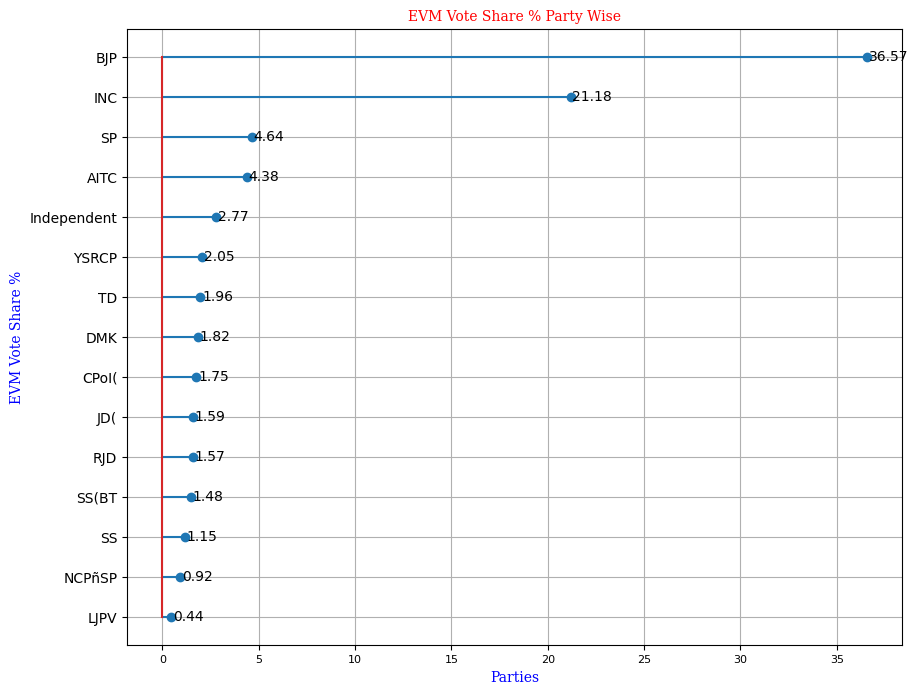

In [ ]:
temp_df = temp_df.sort_values(by='N.WinningSeats',ascending=False)
temp_df1 = data[data['PartyAbr'].isin(temp_df['PartyAbr'].head(15).values)]
temp = temp_df1.groupby('PartyAbr')['EVM Votes'].sum()/data['EVM Votes'].sum() * 100
vote_share_df = temp.reset_index().rename(columns={'EVM Votes':'EVM Vote Share %'}).sort_values(by='EVM Vote Share %',ascending=False)

plt.figure(figsize=(10,8))
plt.stem(vote_share_df['PartyAbr'][::-1],vote_share_df['EVM Vote Share %'][::-1],orientation='horizontal',)
plt.xticks(size=8)
plt.xlabel('Parties',color='blue',font='serif')
plt.ylabel('EVM Vote Share %',color='blue',font='serif')
plt.title('EVM Vote Share % Party Wise',color='red',font='serif')
plt.grid()
for i in range(len(vote_share_df)):
    plt.text(
        vote_share_df['EVM Vote Share %'][::-1].iloc[i]+0.1,
        i,
        str(round(vote_share_df['EVM Vote Share %'][::-1].iloc[i],2)),
        va='center',
        fontsize=10,
        color='black'
    )
plt.show()

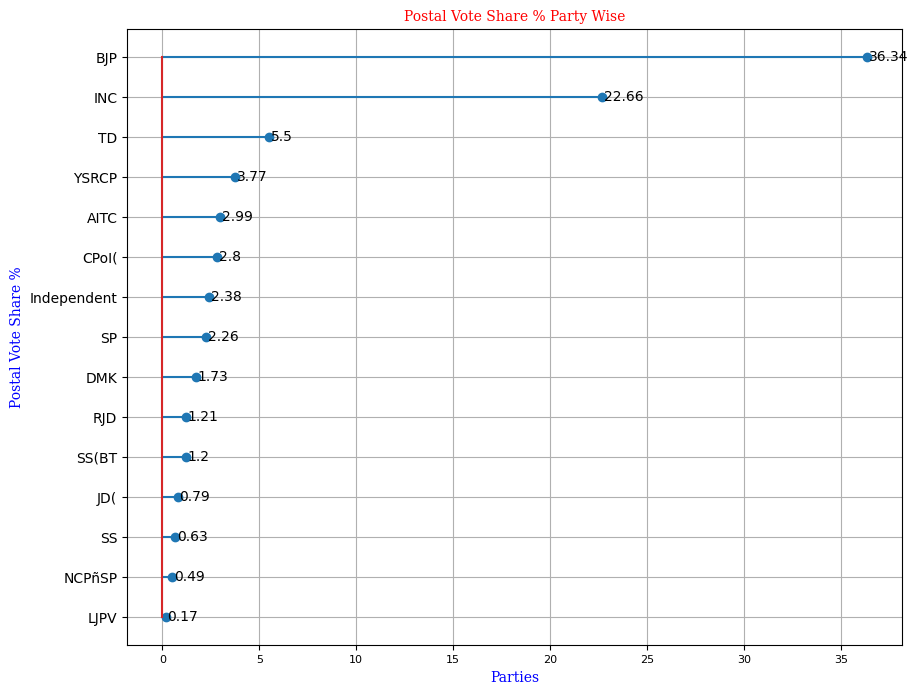

In [ ]:
temp_df = temp_df.sort_values(by='N.WinningSeats',ascending=False)
temp_df1 = data[data['PartyAbr'].isin(temp_df['PartyAbr'].head(15).values)]
temp = temp_df1.groupby('PartyAbr')['Postal Votes'].sum()/data['Postal Votes'].sum() * 100
vote_share_df = temp.reset_index().rename(columns={'Postal Votes':'Postal Vote Share %'}).sort_values(by='Postal Vote Share %',ascending=False)

plt.figure(figsize=(10,8))
plt.stem(vote_share_df['PartyAbr'][::-1],vote_share_df['Postal Vote Share %'][::-1],orientation='horizontal',)
plt.xticks(size=8)
plt.xlabel('Parties',color='blue',font='serif')
plt.ylabel('Postal Vote Share %',color='blue',font='serif')
plt.title('Postal Vote Share % Party Wise',color='red',font='serif')
plt.grid()
for i in range(len(vote_share_df)):
    plt.text(
        vote_share_df['Postal Vote Share %'][::-1].iloc[i]+0.1,
        i,
        str(round(vote_share_df['Postal Vote Share %'][::-1].iloc[i],2)),
        va='center',
        fontsize=10,
        color='black'
    )
plt.show()

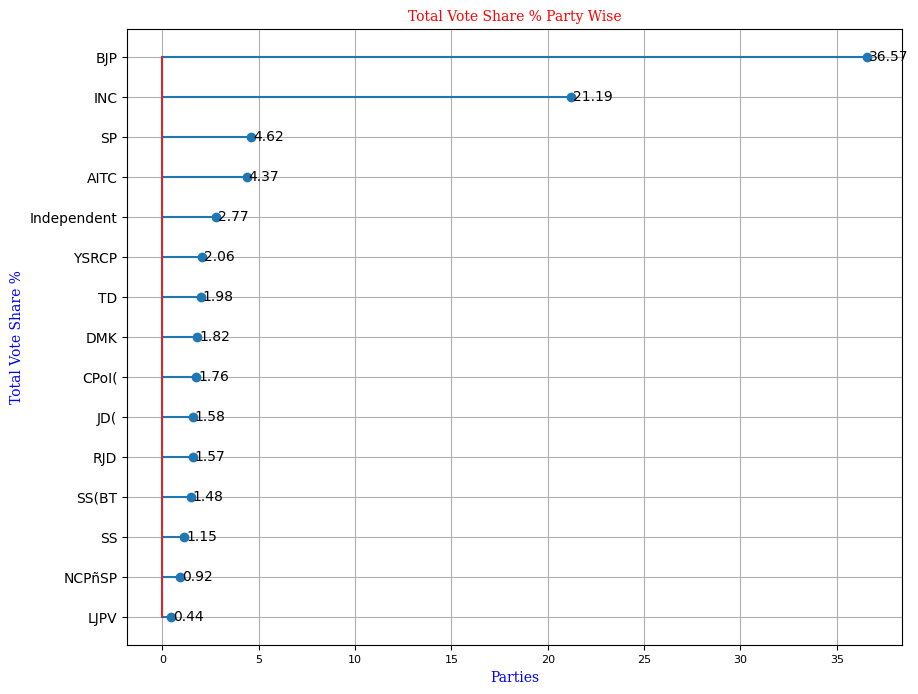

In [ ]:
temp_df = temp_df.sort_values(by='N.WinningSeats',ascending=False)
temp_df1 = data[data['PartyAbr'].isin(temp_df['PartyAbr'].head(15).values)]
temp = temp_df1.groupby('PartyAbr')['Total Votes'].sum()/data['Total Votes'].sum() * 100
vote_share_df = temp.reset_index().rename(columns={'Total Votes':'Total Vote Share %'}).sort_values(by='Total Vote Share %',ascending=False)

plt.figure(figsize=(10,8))
plt.stem(vote_share_df['PartyAbr'][::-1],vote_share_df['Total Vote Share %'][::-1],orientation='horizontal',)
plt.xticks(size=8)
plt.xlabel('Parties',color='blue',font='serif')
plt.ylabel('Total Vote Share %',color='blue',font='serif')
plt.title('Total Vote Share % Party Wise',color='red',font='serif')
plt.grid()
for i in range(len(vote_share_df)):
    plt.text(
        vote_share_df['Total Vote Share %'][::-1].iloc[i]+0.1,
        i,
        str(round(vote_share_df['Total Vote Share %'][::-1].iloc[i],2)),
        va='center',
        fontsize=10,
        color='black'
    )
plt.show()

# 🔍 Insights from Vote Share
🗳️ EVM Vote Share
BJP received the highest EVM vote share: 36.57%

Congress followed with 21.18%

Other notable parties:

SP: 4.59%

TMC: 4.38%

YSRCP, Telugu Desam, and DMK each had ~2–3%

📮 Postal Vote Share
BJP again led with 36.33%, followed by:

Congress: 22.67%

Telugu Desam: 5.56%

YSRCP: 3.76%

Many small parties had less than 1% share.

🧮 Total Vote Share
Overall, BJP secured 36.56% of all votes, indicating its strong presence despite not achieving majority.

Congress had 21.19%, showing significant growth.

Only a few parties crossed the 4% mark in total vote share.

# PARTIES PERFORMANCE STATE WISE


## Win Ratio

/tmp/ipython-input-1356356494.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=merged_df,y='State',x='nwinseat',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False,)


Text(0.5, 0.98, 'Top 15 Parties No.Of WonSeats State Wise')

<Figure size 1000x800 with 0 Axes>

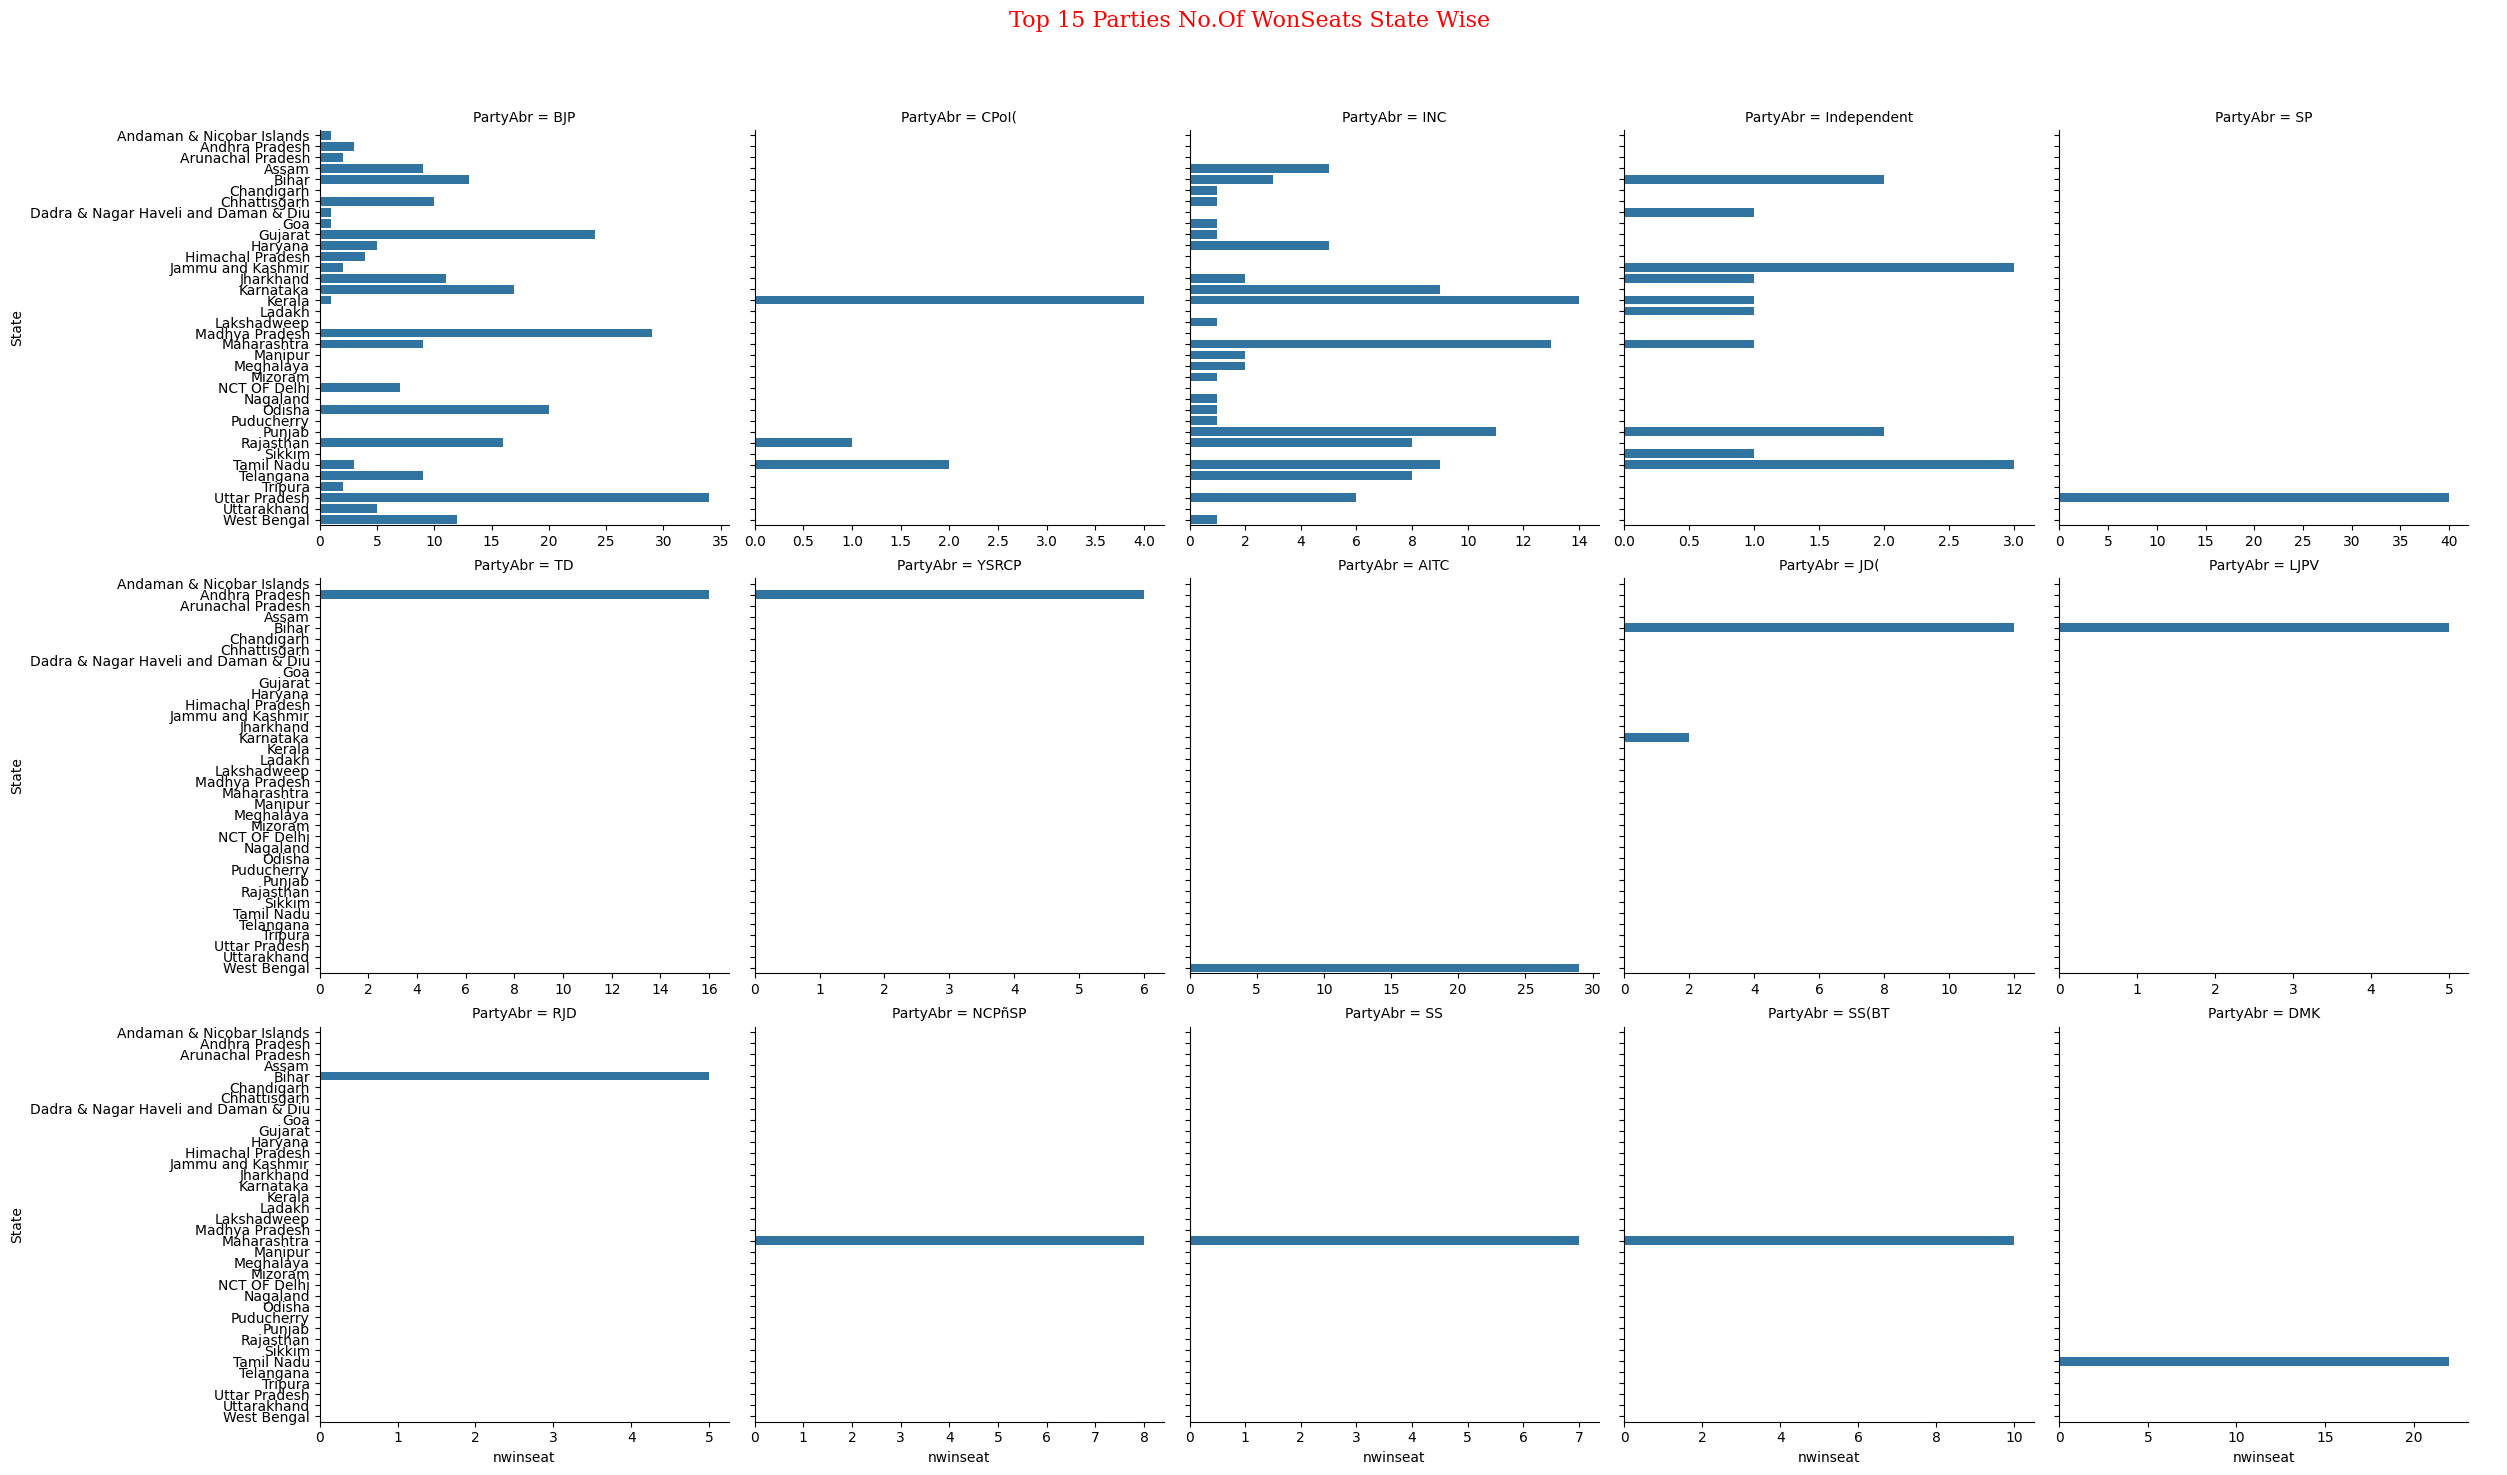

In [ ]:
t10p = data[data['PartyAbr'].isin(temp_df['PartyAbr'].head(15).values)]
x = t10p.groupby('Constituency')[['PartyAbr','State']].nth(0)
t2 = x.groupby(['State','PartyAbr'])['PartyAbr'].count().rename(index='nwinseat').reset_index()
t1 = t10p.groupby(['State','PartyAbr'])['PartyAbr'].count().rename(index='totalparticipation').reset_index()
merged_df = pd.merge(t1,t2,how='outer').fillna(0)
merged_df['win_ration']=(merged_df['nwinseat']/merged_df['totalparticipation'])*100
merged_df

plt.figure(figsize=(10,8))
g = sns.catplot(data=merged_df,y='State',x='nwinseat',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False,)
#plt.title('Party Performance State Wise',color='red',font='serif')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 15 Parties No.Of WonSeats State Wise", fontsize=16, color='red', font='serif')


/tmp/ipython-input-1135126668.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=merged_df,y='State',x='win_ration',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False)


Text(0.5, 0.98, 'Top 15 Parties WinRatio State Wise')

<Figure size 1000x800 with 0 Axes>

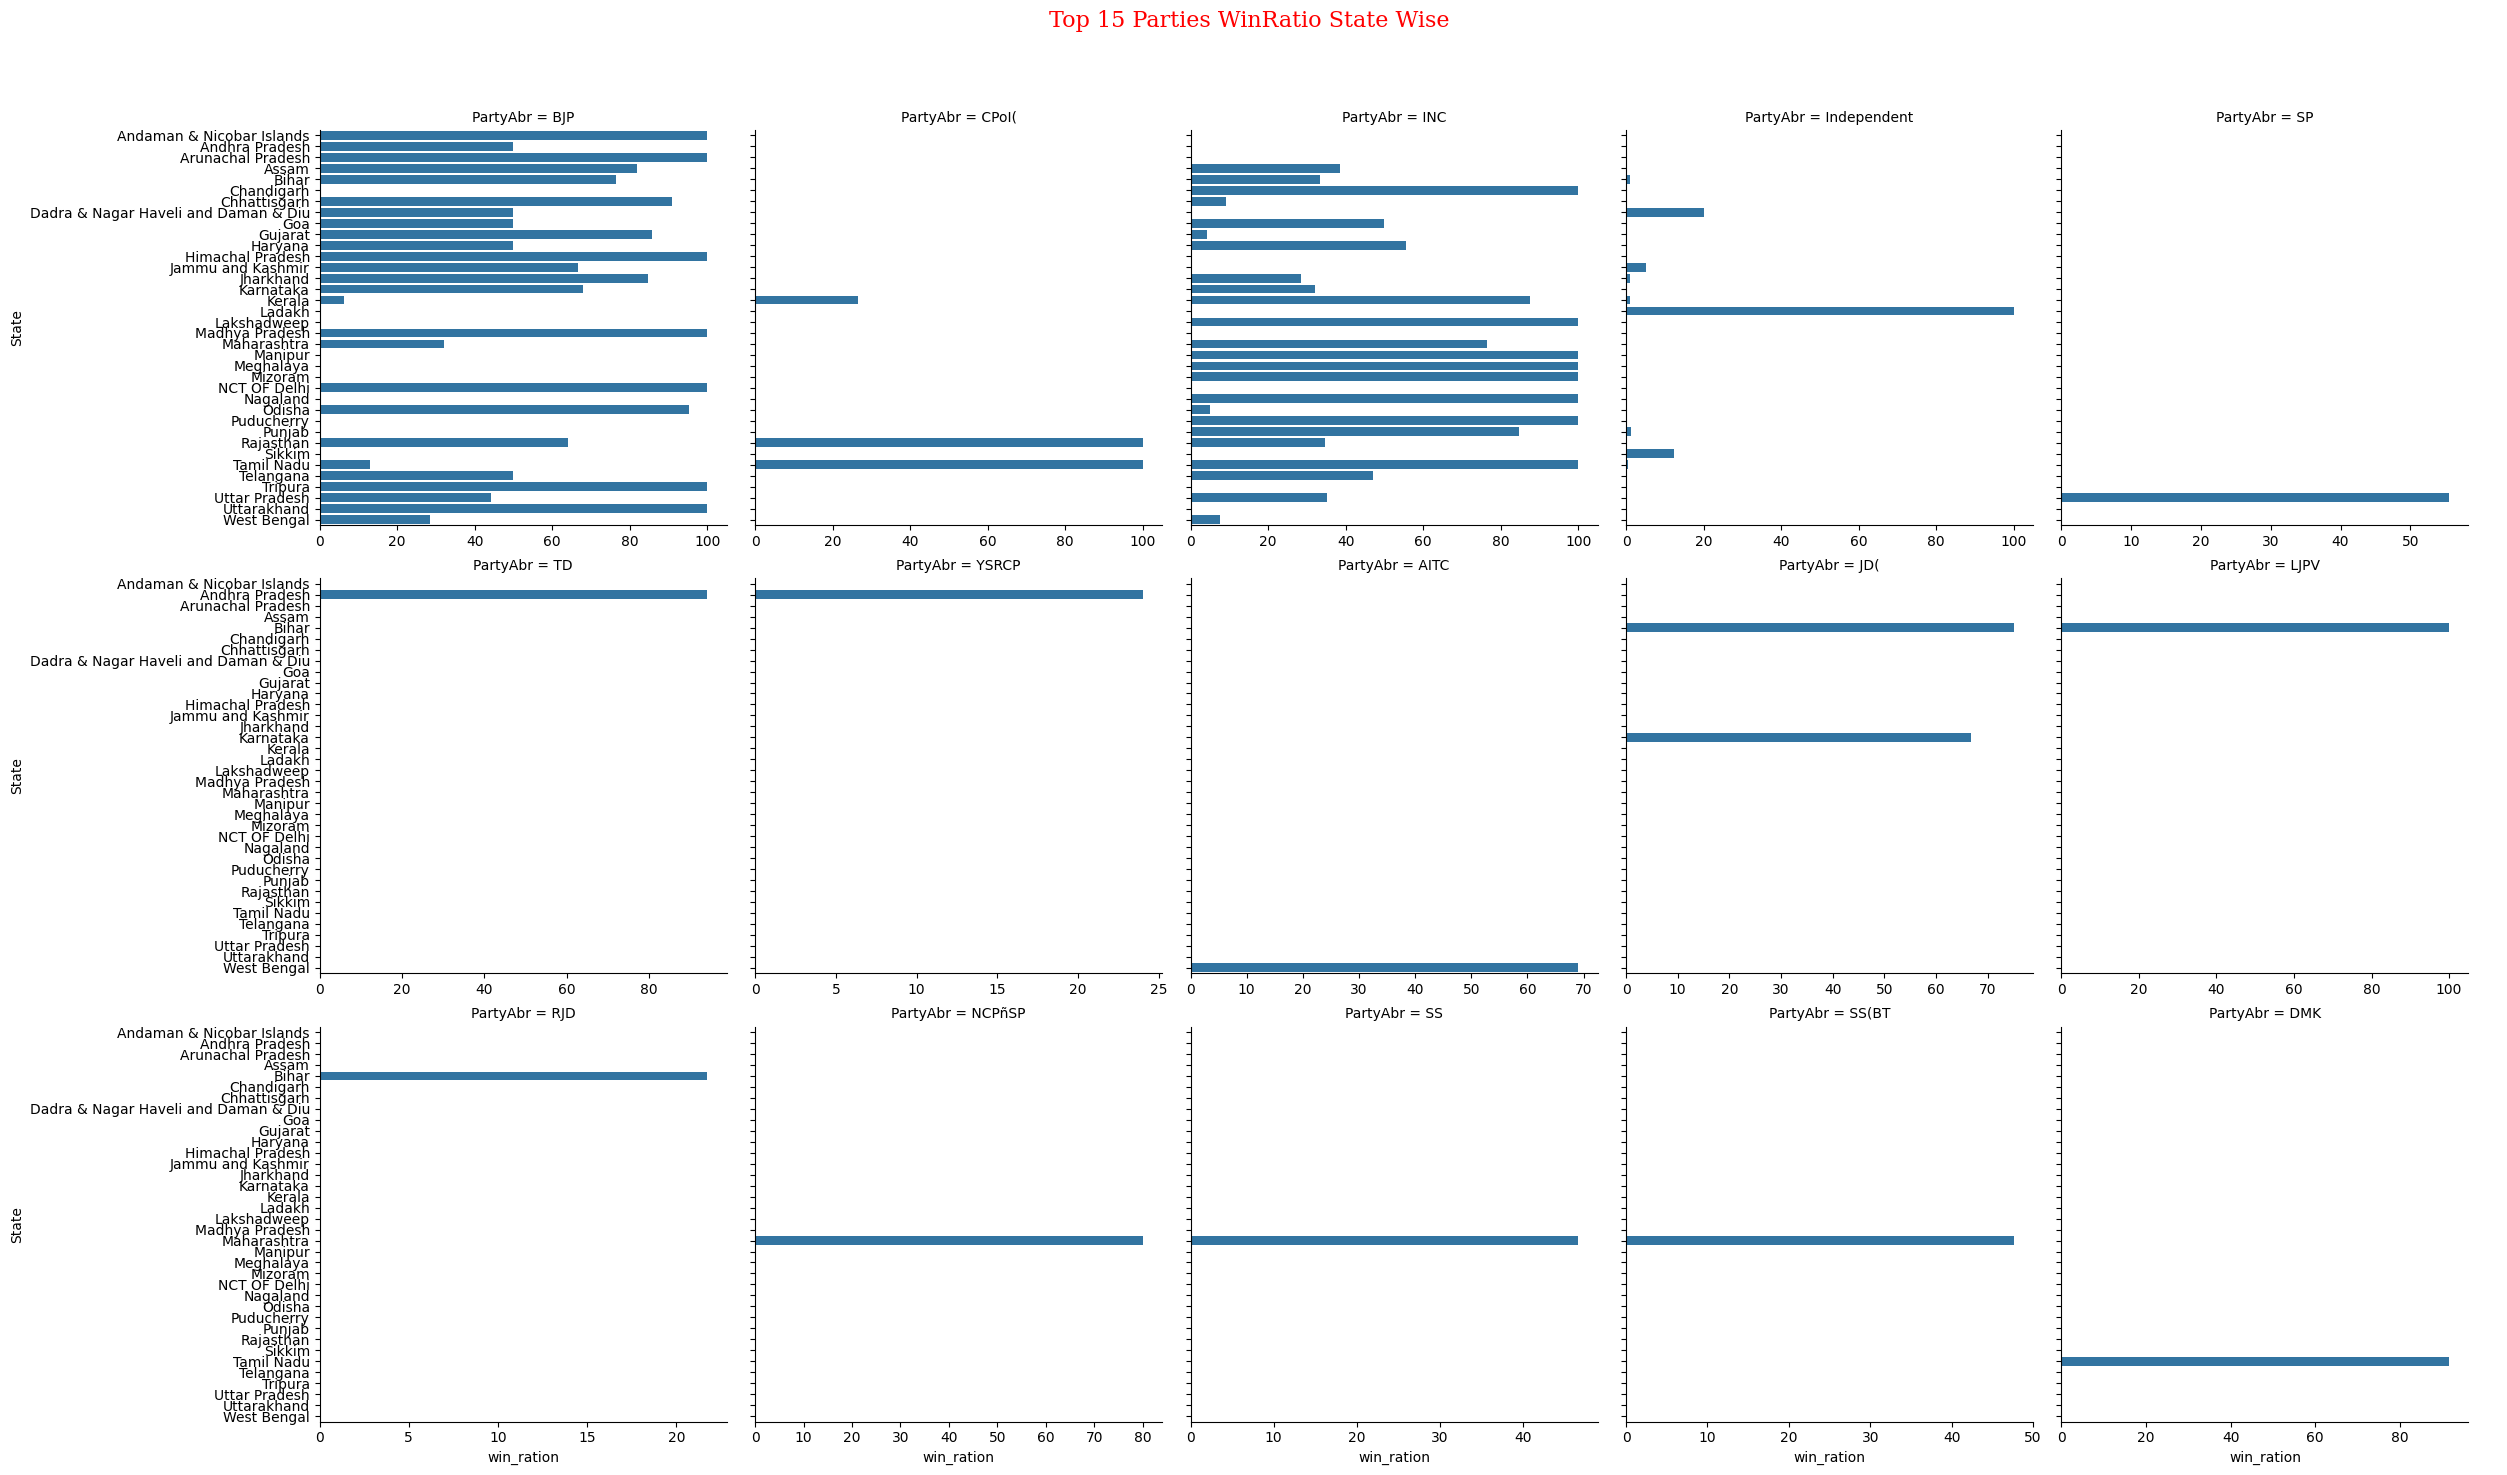

In [ ]:
plt.figure(figsize=(10,8))
g = sns.catplot(data=merged_df,y='State',x='win_ration',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 15 Parties WinRatio State Wise", fontsize=16, color='red', font='serif')


# 🔍 State-wise Party Performance Insights
BJP had 100% win ratio in:

Andaman & Nicobar, Arunachal Pradesh, Himachal Pradesh, Madhya Pradesh, NCT of Delhi, Tripura, and Uttarakhand

Telugu Desam also achieved 100% win ratio in Andhra Pradesh (17 out of 17 seats).

DMK and INC had perfect win ratios in Tamil Nadu (DMK: 22/22, INC: 9/9).

BJP’s strongholds with over 90% win rate include:

Bihar (94%), Gujarat (96%), Chhattisgarh (91%), Odisha (95%)

INC dominated:

Kerala (15/16 seats, 94%), Punjab (11/13 seats, 85%)

Samajwadi Party (SP) performed best in Uttar Pradesh with a 64.5% win ratio (40/62 seats).

BJP struggled in:

Punjab (0 wins), Manipur, Mizoram, Sikkim, Chandigarh, and Puducherry

Independent candidates contested heavily in many states (e.g., 625 in Maharashtra, 610 in Tamil Nadu) but won only a few or none.



## Avg EVM Vote Percent In Each State

/tmp/ipython-input-2029965197.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=temp_df,y='State',x='Avg % of Votes',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False)


Text(0.5, 0.98, 'Top 15 Parties WinRatio State Wise')

<Figure size 1000x800 with 0 Axes>

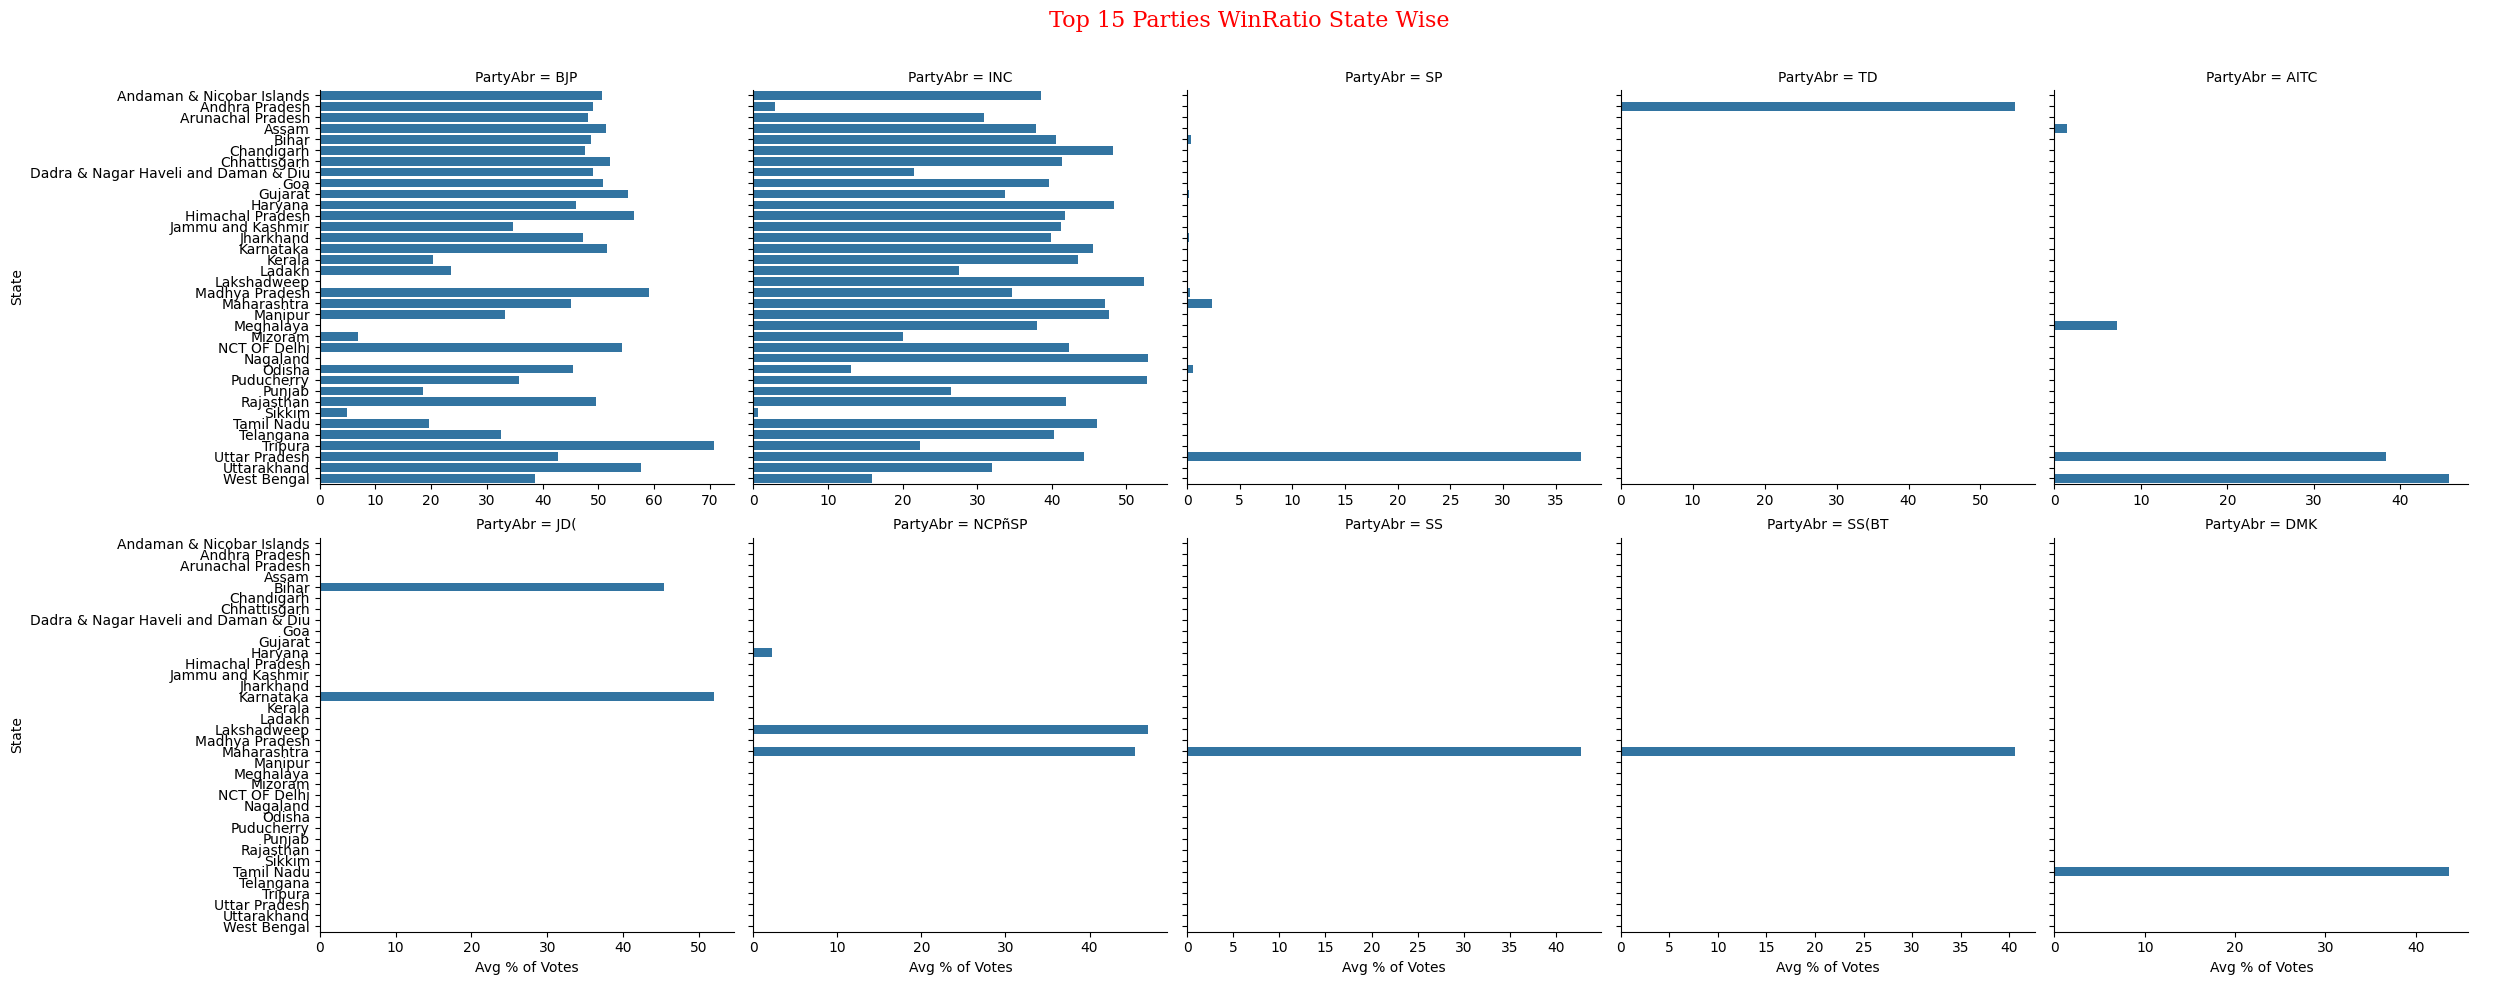

In [ ]:
t10p = data[data['PartyAbr'].isin(temp_df['PartyAbr'].head(10).values)]
temp_df = t10p.groupby(['State','PartyAbr'])['% of Votes'].mean().rename('Avg % of Votes').reset_index()
plt.figure(figsize=(10,8))
g = sns.catplot(data=temp_df,y='State',x='Avg % of Votes',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 15 Parties WinRatio State Wise", fontsize=16, color='red', font='serif')


# 🔍 Insights from Average Vote Share by State
🟢 Highest Vote Shares by Party in Any State
Tripura (BJP): 70.70% — Highest average vote share by any party in a state.

Gujarat (BJP): 61.92%

Madhya Pradesh (BJP): 59.08%

Uttarakhand (BJP): 57.54%

NCT Delhi (BJP): 54.23%

Andhra Pradesh (TDP): 54.81%

Lakshadweep (INC): 52.29%

🔵 Congress Strongholds
Lakshadweep: 52.29%

Puducherry: 52.73%

Kerala: 43.44%

Manipur: 47.63%

Maharashtra: 47.06%

Tamil Nadu: 46.06%

🔴 BJP Dominant States
Tripura, Gujarat, Madhya Pradesh, NCT Delhi, Chhattisgarh, Uttarakhand, Assam, Karnataka — all with avg vote % > 50%

🟠 Regional Party Highlights
TDP in Andhra Pradesh: 54.81%

DMK in Tamil Nadu: 47.58%

Shiv Sena (UBT) in Maharashtra: 40.59%

TMC in West Bengal: 45.63%

⚠️ Low Performance Zones
BJP had low vote shares in:

Punjab: 18.54%

Tamil Nadu: 19.60%

Kerala: 20.39%

Congress had weak presence in:

Odisha: 13.05%

Andhra Pradesh: 2.93%

Sikkim: 0.58%

## Avg Postal Vote Percent In Each State

/tmp/ipython-input-142910198.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=mergedf,y='State',x='Postal Vote share %',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False)


<Figure size 1000x800 with 0 Axes>

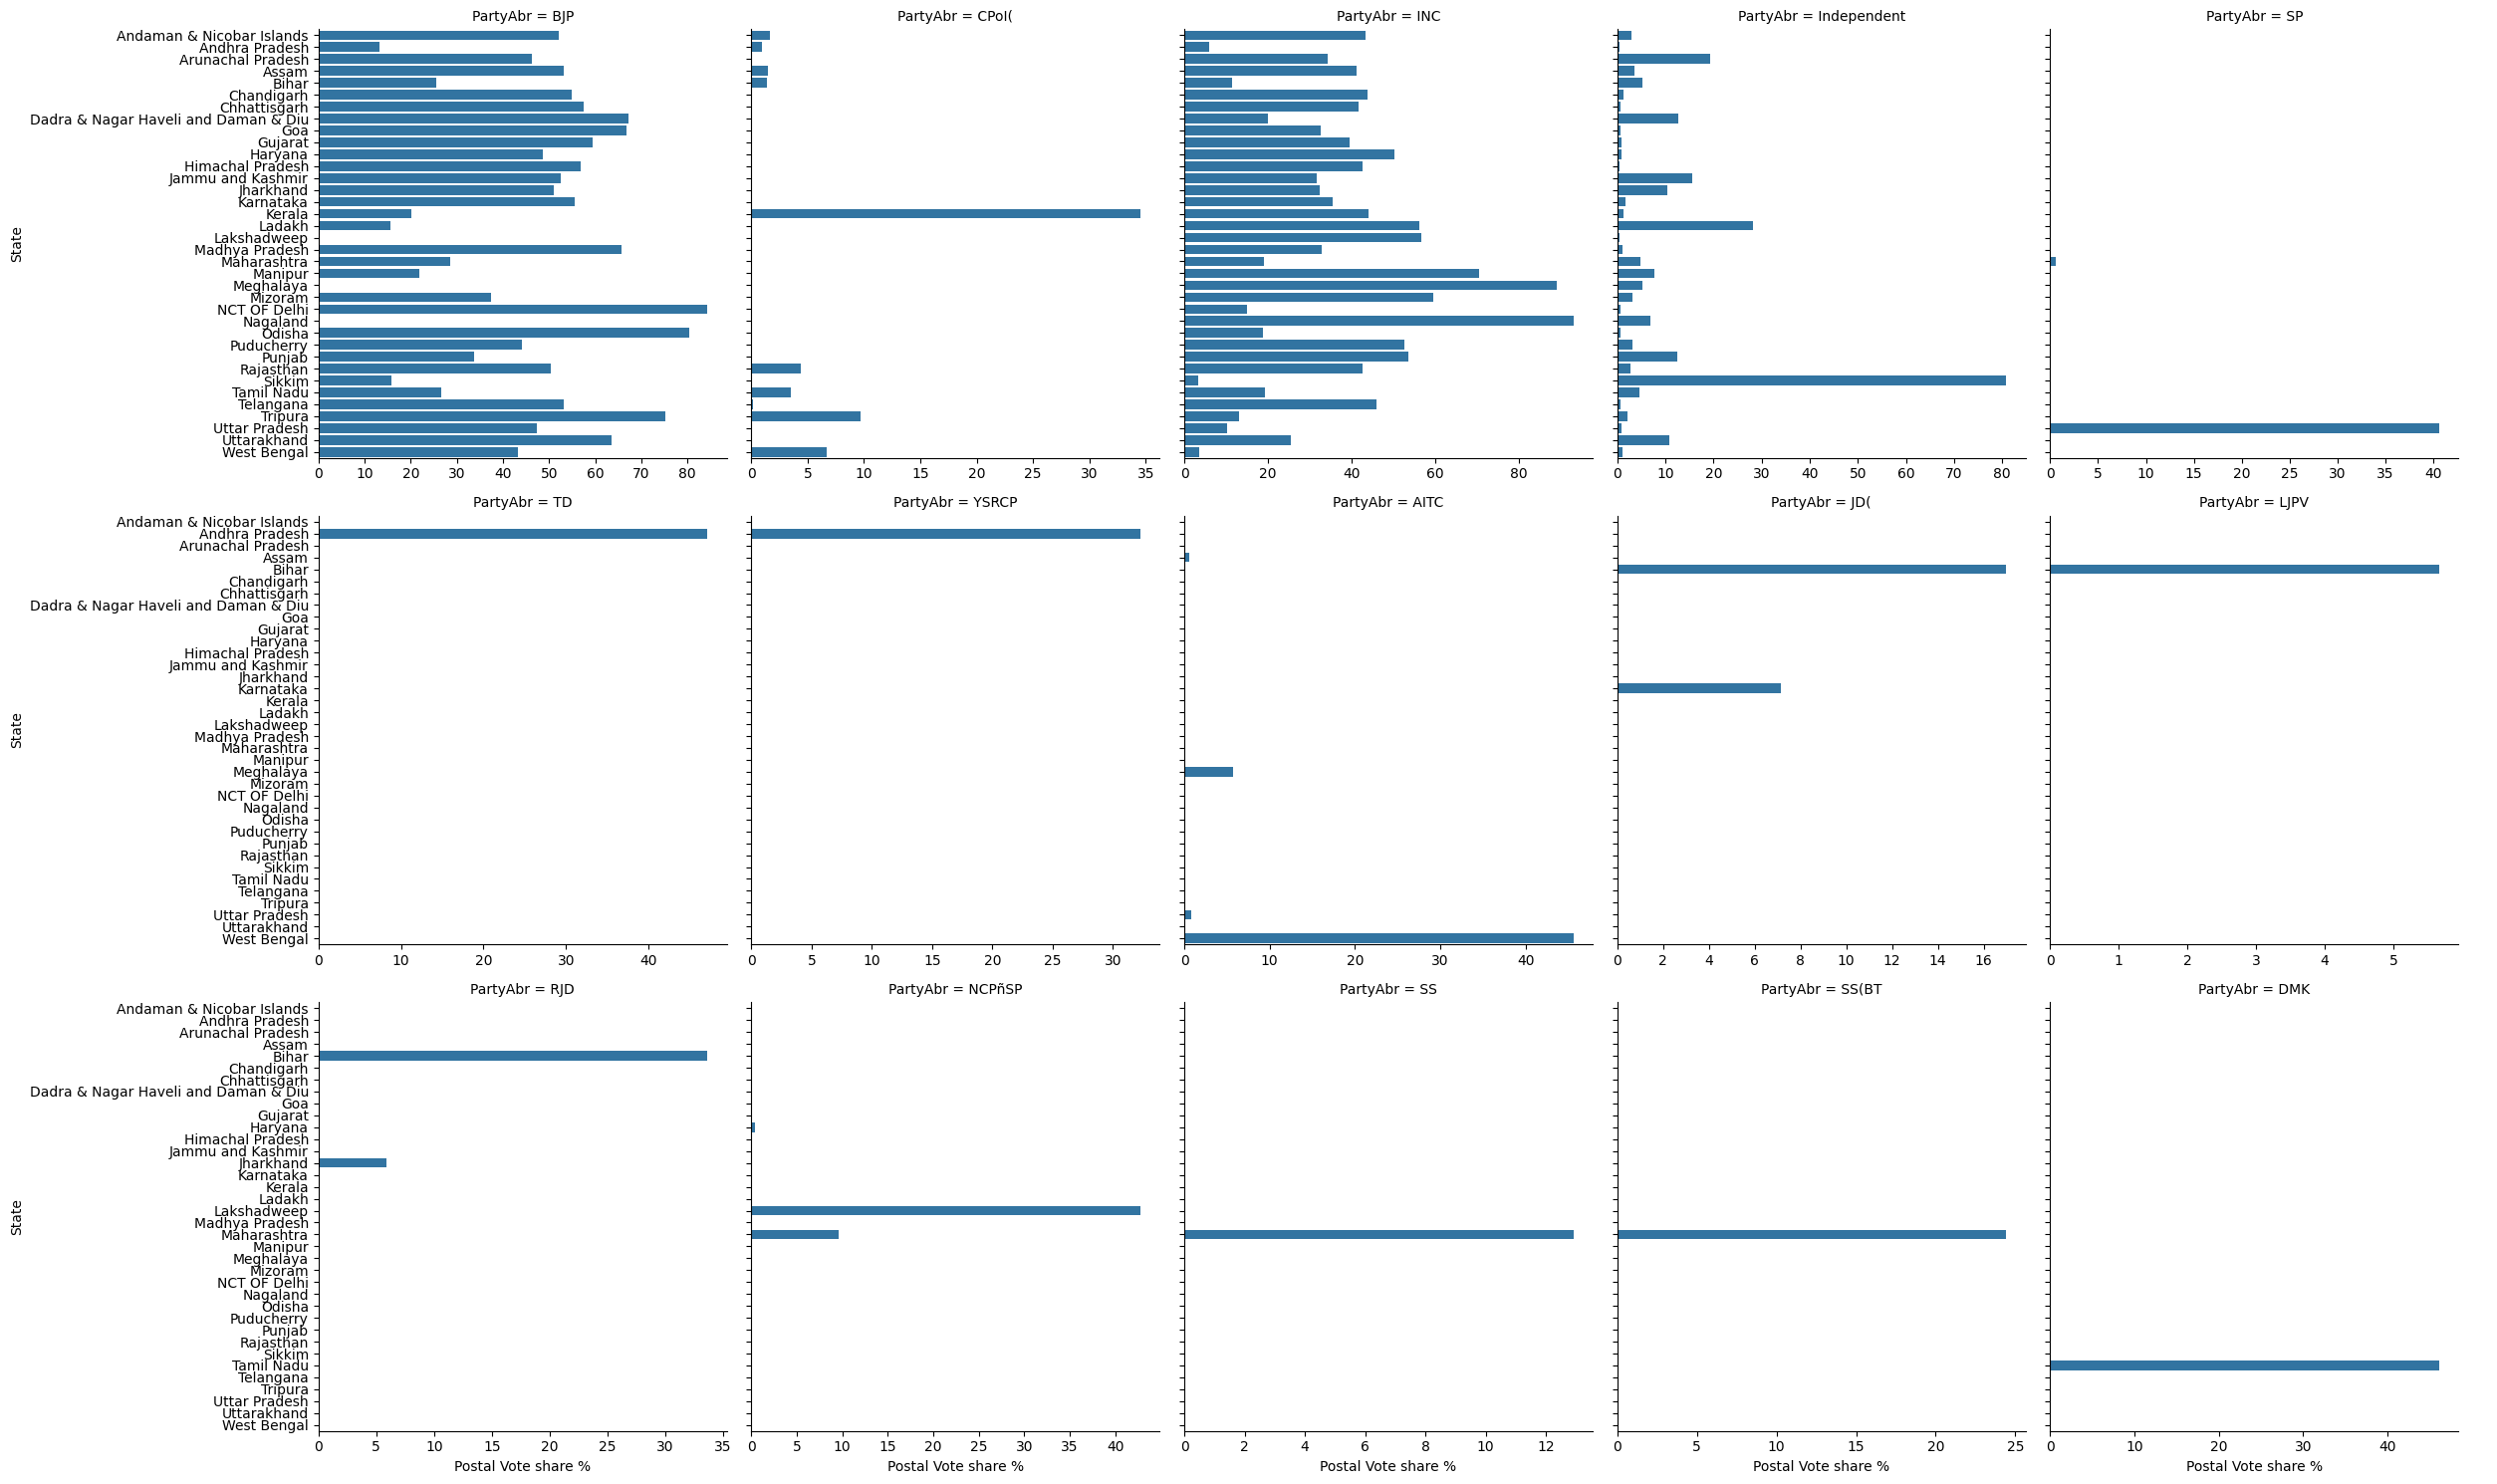

In [ ]:
temp_df = data.groupby('Constituency')['PartyAbr'].head(1).value_counts().reset_index().rename(columns={'count':'N.WinningSeats'}).sort_values('N.WinningSeats',ascending=False)
t10p = data[data['PartyAbr'].isin(temp_df['PartyAbr'].head(15).values)]
x = t10p.groupby(['State','PartyAbr'])['Postal Votes'].sum().reset_index()
y = t10p.groupby('State')['Postal Votes'].sum().reset_index()
mergedf = pd.merge(x,y,on=['State'],how='outer')
mergedf['Postal Vote share %'] = (mergedf['Postal Votes_x'] / mergedf['Postal Votes_y']) * 100

plt.figure(figsize=(10,8))
g = sns.catplot(data=mergedf,y='State',x='Postal Vote share %',kind='bar',col='PartyAbr',col_wrap=5,ci=None,sharex=False)
# # plt.subplots_adjust(top=0.9)
# g.fig.suptitle("Top 15 Parties WinRatio State Wise", fontsize=16, color='red', font='serif')


# Insights
<table>
  <tr>
    <th>Party</th>
    <th>Average Vote % Trend</th>
    <th>Postal Vote % Trend</th>
    <th>Insight</th>
  </tr>
  <tr>
    <td><b>BJP</b></td>
    <td>High</td>
    <td>Even Higher</td>
    <td>Trusted by government employees and institutional voters</td>
  </tr>
  <tr>
    <td><b>INC</b></td>
    <td>Varies</td>
    <td>Sometimes higher</td>
    <td>Stronger among educated voters in selected states</td>
  </tr>
  <tr>
    <td><b>Regional Parties</b></td>
    <td>High in base states</td>
    <td>Often even higher</td>
    <td>Deep local trust (e.g., TDP, DMK, Shiv Sena)</td>
  </tr>
  <tr>
    <td><b>Independents</b></td>
    <td>Very Low</td>
    <td>Even Lower</td>
    <td>Less trusted by official and service-class voters</td>
  </tr>
</table>


# BJP SPECIFIC ANALYSIS

In [ ]:
def compute_margin(group):
    group = group.sort_values(by='Total Votes', ascending=False)
    if len(group) >= 2:
        margin = group.iloc[0]['Total Votes'] - group.iloc[1]['Total Votes']
        group.loc[group.index[0], 'Victory_Loss_Margin'] = margin
        group.loc[group.index[1], 'Victory_Loss_Margin'] = -margin
    else:
        group['Victory_Loss_Margin'] = None
    return group



In [ ]:
seatsbjpfight = data[data['Party']=='Bharatiya Janata Party']['Constituency'].unique()
tmp1 = data[data['Constituency'].isin(seatsbjpfight)]
top2parties = tmp1.groupby('Constituency').head(2)

result = top2parties.groupby('Constituency', group_keys=False).apply(compute_margin)
result1 = result[result['Party']=='Bharatiya Janata Party'][['Party','State','Constituency','Victory_Loss_Margin']]
result1['Result'] = result1['Victory_Loss_Margin'].apply(lambda x:'Won' if x>0 else 'Loss')
result1['Margin'] = abs(result1['Victory_Loss_Margin'])
result1.drop(columns=['Victory_Loss_Margin'],inplace=True)


/tmp/ipython-input-3270330443.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = top2parties.groupby('Constituency', group_keys=False).apply(compute_margin)


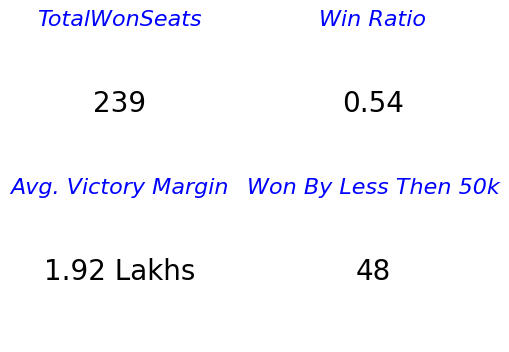

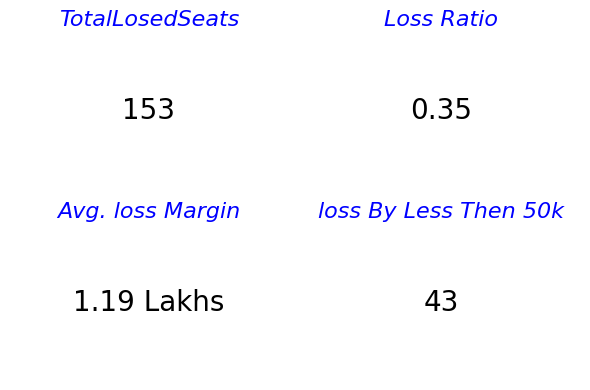

In [ ]:
wonseats = result1[result1['Result']=='Won'].shape[0]
win_per = round(result1[result1['Result']=='Won'].shape[0]/440,2)
avg_vic_margin = round(result1[result1['Result']=='Won']['Margin'].mean() / 100000,2)
wonby50k = (result1[result1['Result']=='Won']['Margin']<50000).sum()

losedseats = result1[result1['Result']=='Loss'].shape[0]
loss_per = round(result1[result1['Result']=='Loss'].shape[0]/440,2)
avg_loss_margin = round(result1[result1['Result']=='Loss']['Margin'].mean() / 100000,2)
lossby50k = (result1[result1['Result']=='Loss']['Margin']<50000).sum()

figure,ax = plt.subplots(figsize=(6, 4),nrows=2,ncols=2,)
ax[0,0].text(0.5, 0.5, f"{wonseats}", fontsize=20, ha='center', va='center')
ax[0,0].axis('off')
ax[0,0].set_title("TotalWonSeats",fontsize=16,color='blue',fontstyle='italic')

ax[0,1].text(0.5, 0.5, f"{win_per}", fontsize=20, ha='center', va='center')
ax[0,1].axis('off')
ax[0,1].set_title("Win Ratio", fontsize=16,color='blue',fontstyle='italic')

ax[1,0].text(0.5, 0.5, f"{avg_vic_margin} Lakhs", fontsize=20, ha='center', va='center')
ax[1,0].axis('off')
ax[1,0].set_title("Avg. Victory Margin",fontsize=16,color='blue',fontstyle='italic')

ax[1,1].text(0.5, 0.5, f"{wonby50k}", fontsize=20, ha='center', va='center')
ax[1,1].axis('off')
ax[1,1].set_title("Won By Less Then 50k", fontsize=16,color='blue',fontstyle='italic')

figure,ax = plt.subplots(figsize=(6, 4),nrows=2,ncols=2,)
ax[0,0].text(0.5, 0.5, f"{losedseats}", fontsize=20, ha='center', va='center')
ax[0,0].axis('off')
ax[0,0].set_title("TotalLosedSeats",fontsize=16,color='blue',fontstyle='italic')

ax[0,1].text(0.5, 0.5, f"{loss_per}", fontsize=20, ha='center', va='center')
ax[0,1].axis('off')
ax[0,1].set_title("Loss Ratio", fontsize=16,color='blue',fontstyle='italic')

ax[1,0].text(0.5, 0.5, f"{avg_loss_margin} Lakhs", fontsize=20, ha='center', va='center')
ax[1,0].axis('off')
ax[1,0].set_title("Avg. loss Margin",fontsize=16,color='blue',fontstyle='italic')

ax[1,1].text(0.5, 0.5, f"{lossby50k}", fontsize=20, ha='center', va='center')
ax[1,1].axis('off')
ax[1,1].set_title("loss By Less Then 50k", fontsize=16,color='blue',fontstyle='italic')




plt.tight_layout()
plt.show()




###  Overall Results
- **Won Seats:** 239 (needed 272 for majority)
- **Lost Seats:** 153
- **Win Ratio:** 54% of seats contested
- **Loss Ratio:** 35% of seats contested

---

###  Wins
- **Average Victory Margin:** 1.92 lakh votes (big wins in many areas)
- **Narrow Wins (<50k votes):** 48 seats (these are risky seats for next time)

---

### Losses
- **Average Loss Margin:** 1.19 lakh votes (opposition was strong here)
- **Narrow Losses (<50k votes):** 43 seats (could be won next time with better strategy)

---

### Key Reasons for Missing Majority
1. **Too many close contests** – Many seats were decided by small margins.
2. **Strong opposition alliances** – United opposition reduced BJP’s seat count.
3. **Losses in key states** – Underperformance in important states hurt overall numbers.
4. **Vote swings mattered** – Small shifts in votes could have changed the result in many places.

---

###  What This Means
- BJP still won more than half the seats it contested, but **did not reach the majority mark**.
- Needs to **protect narrow wins** and **focus on swing seats** to improve in the next election.


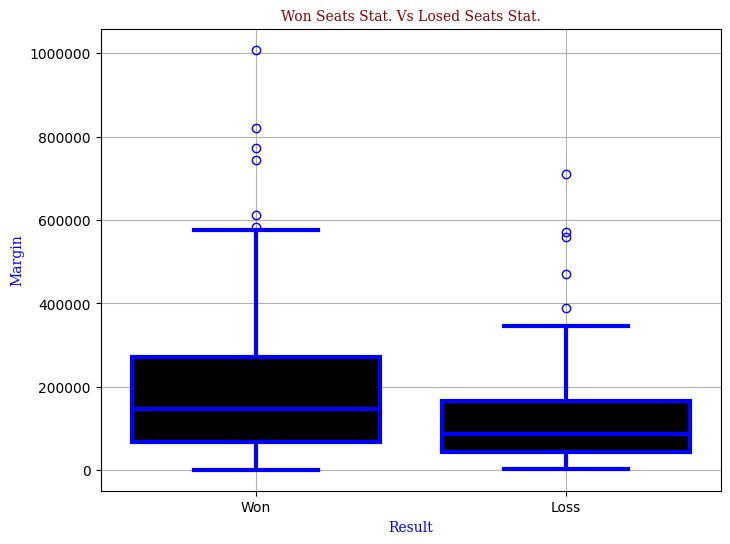

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=result1,y='Margin',x='Result',color='black',linecolor='blue',linewidth=3)
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation and show full numbers
plt.xlabel('Result',color='blue',font='serif')
plt.ylabel('Margin',color='blue',font='serif')
plt.title('Won Seats Stat. Vs Losed Seats Stat.',color='darkred',font='serif')
plt.grid()


##  Won vs Lost Seats  Margin Analysis

### What the chart shows:
- **Left box (Won):** Margins of victory for seats BJP won.
- **Right box (Lost):** Margins of defeat for seats BJP lost.

### Key observations:
1. **Bigger margins in wins** – In many seats BJP won, the victory margin was large, meaning these were strongholds.
2. **Smaller margins in losses** – Many lost seats had smaller margins, meaning they were competitive and could be won in the future.
3. **Some very close contests** – Both won and lost categories have seats with margins close to zero — these are swing seats.
4. **Outliers** – Some wins and losses have extremely high margins (dots above the main box) showing exceptional cases.

### Why this matters:
- Protect **stronghold seats** where margins are already high.
- Focus on **narrow losses** — these are easier to win next time with better strategy.
- Watch **narrow wins** — these are at risk of being lost if voter sentiment changes.


## STATE WISE BJP PERFORMANCE

In [ ]:
t1 = result1.groupby('State')['Party'].count().rename('Nseatfight').reset_index()
t2 = result1[result1['Result']=='Won'].groupby('State')['Party'].count().rename('nWonseat').reset_index()
tmp1 = pd.merge(t1,t2,how='outer').fillna(0)
tmp1['Win%'] = round((tmp1['nWonseat']/tmp1['Nseatfight'])*100,2)
tmp1.sort_values(by='Win%',ascending=False,inplace=True)
t3 = round(result1[result1['Result']=='Won'].groupby('State')['Margin'].mean()).rename('AvgWinMargin').reset_index()
tmp2 = pd.merge(tmp1,t3,how='outer')
t4 = round(result1[result1['Result']=='Loss'].groupby('State')['Margin'].mean()).rename('AvgLossMargin').reset_index()
final_df = pd.merge(tmp2,t4,how='outer').fillna(0).sort_values(by='Win%',ascending=False)


In [ ]:
def Avr(text):
  text = text.split(' ')
  if len(text)<=1:
    if len(text[0])<=3:
      abr = text[0]
    else:
      abr = text[0][:3]
  else:
    abr = ''.join([i[0] for i in text])
  return abr

final_df['stateabr'] = final_df['State'].apply(Avr)

In [ ]:
idx = final_df[final_df['State']=='Arunachal Pradesh'].index
final_df.loc[idx,'stateabr'] = 'AR'

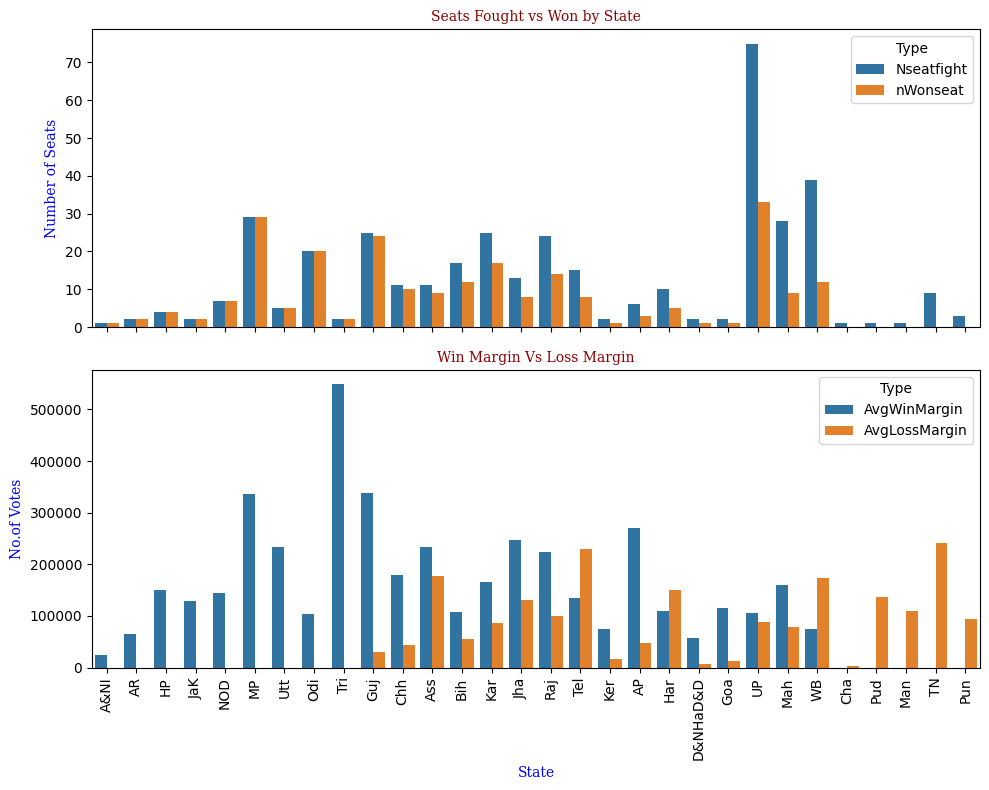

In [ ]:
df_melted1 = final_df.melt(id_vars='stateabr', value_vars=['Nseatfight', 'nWonseat'],
                    var_name='Type', value_name='Count')
melted_df2 = final_df.melt(id_vars='stateabr',value_vars=['AvgWinMargin','AvgLossMargin'],var_name='Type',value_name='Margin')

fig,ax = plt.subplots(figsize=(10,8),nrows=2,ncols=1,sharex=True)
sns.barplot(data=df_melted1, x='stateabr', y='Count', hue='Type',ax=ax[0])
ax[0].tick_params(axis='x',rotation=90)
ax[0].set_title('Seats Fought vs Won by State',size=20,font='serif',color='darkred')
ax[0].set_ylabel('Number of Seats',font='serif',color='blue')
ax[0].set_xlabel('State',font='serif',color='blue')

sns.barplot(data=melted_df2,x='stateabr',y='Margin',hue='Type',ax=ax[1])
ax[1].tick_params(axis='x',rotation=90)
ax[1].set_title('Win Margin Vs Loss Margin',size=20,font='serif',color='darkred')
ax[1].set_ylabel('No.of Votes',font='serif',color='blue')
ax[1].set_xlabel('State',font='serif',color='blue')

plt.tight_layout()
plt.show()




###  Seats Fought vs Seats Won (Top Chart)
- **Blue bars** = Seats BJP fought in each state.
- **Orange bars** = Seats BJP won in each state.
- In some states, BJP converted most of its contested seats into wins (e.g., MP, Gujarat, Odisha,).
- In other states, BJP fought many seats but won fewer (e.g., West Bengal, Maharashtra, Tamil Nadu).

---

###  Average Win Margin vs Average Loss Margin (Bottom Chart)
- **Blue bars** = Average victory margin in each state.
- **Orange bars** = Average loss margin in each state.
- Very high win margins in states like **Odisha, Tripura, Gujarat** → Strong BJP base.
- High loss margins in states like **Tamil Nadu, West Bengal, Punjab** → Strong opposition base.

BJP has **safe seats** in some states but faces **tough competition** in others where it loses by big margins.

---

###  Insights
1. **Core strength**: BJP dominates in **Hindi belt states** and parts of the east.
2. **Weak zones**: Southern states and West Bengal remain challenging.
3. **Close fights**: Some states have small loss margins → opportunity to gain seats next time.
4. **Strategic focus**: Target states where loss margins are small, and protect narrow wins.




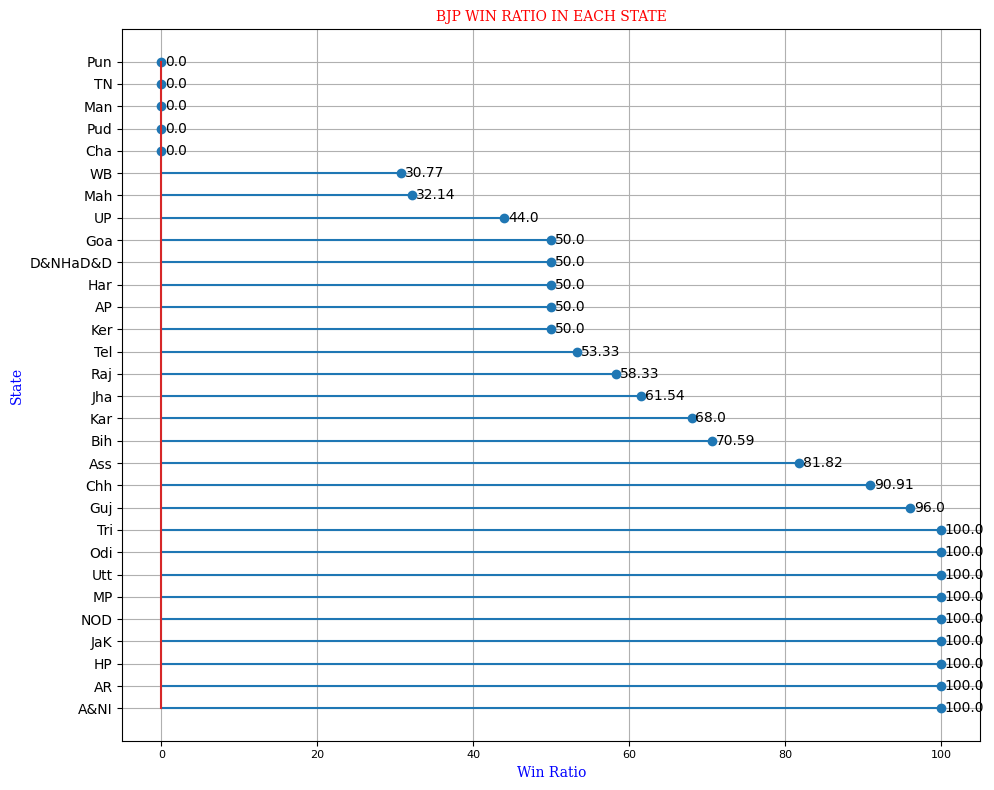

In [ ]:
plt.figure(figsize=(10,8))
plt.stem(final_df['stateabr'],final_df['Win%'],orientation='horizontal',)
plt.xticks(size=8)
plt.ylabel('State',color='blue',font='serif')
plt.xlabel('Win Ratio',color='blue',font='serif')
plt.title('BJP WIN RATIO IN EACH STATE',color='red',font='serif')
plt.grid()
plt.tight_layout()
for i in range(len(final_df)):
    plt.text(
        final_df['Win%'].iloc[i] + 0.5,  # Slight offset for visibility
        i,  # Vertical position
        str(final_df['Win%'].iloc[i]),  # Text: number of seats
        va='center',
        fontsize=10,
        color='black'
    )


## BJP Win Ratio by State

### Insights:
- **Zero wins** in **Punjab, Tamil Nadu, Manipur, Puducherry, Chandigarh** → Strong opposition zones.
- **Low win ratio** in **West Bengal (30.77%), Maharashtra (32.14%), UP (44%)** → Major losses in big states.
- **Moderate performance** (50–70% win ratio) in states like **Goa, Haryana, Telangana, Bihar** → Competitive but not dominant.
- **High win ratio** (80–100%) in **Gujarat, MP, Odisha, Tripura, Arunachal Pradesh, Himachal Pradesh** → BJP strongholds.

### Why it matters:
BJP’s majority loss is mainly due to **weak performance in key large states** despite holding strong in its core areas.


In [ ]:
bjp_perfor = pd.read_csv('BJP_performance.csv')
election_res = pd.read_excel('election-2024.xlsx')
election_res.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12
0,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %
2,1,Adilabad,1,ST,Telangana,Godam Nagesh,Bharatiya Janta Party,"16,50,175","12,35,597",74.9 %,"90,652",7.3%
3,2,Agra,18,SC,Uttar Pradesh [2000 Onwards],Prof S P Singh Baghel,Bharatiya Janta Party,"20,72,685","11,23,779",54.2 %,"2,71,294",24.1%
4,3,Ahmadnagar,37,GEN,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,"19,81,866","13,25,477",66.9 %,"28,929",2.2%


# DATA CLEANING

In [ ]:
election_res.drop(0,inplace=True)
election_res.columns = election_res.loc[1]
election_res.drop(1,inplace=True)
election_res = election_res.drop(columns=['#']).reset_index().drop(columns=['index'])
election_res.head()

1,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %
0,Adilabad,1,ST,Telangana,Godam Nagesh,Bharatiya Janta Party,"16,50,175","12,35,597",74.9 %,"90,652",7.3%
1,Agra,18,SC,Uttar Pradesh [2000 Onwards],Prof S P Singh Baghel,Bharatiya Janta Party,"20,72,685","11,23,779",54.2 %,"2,71,294",24.1%
2,Ahmadnagar,37,GEN,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,"19,81,866","13,25,477",66.9 %,"28,929",2.2%
3,Ahmedabad East,7,GEN,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,"20,38,162","11,28,339",55.4 %,"4,61,755",40.9%
4,Ahmedabad West,8,SC,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,"17,26,987","9,66,646",56.0 %,"2,86,437",29.6%


In [ ]:
# REMOVE UNCONSTESTED CANDIDATE
print(election_res[election_res['Votes']=='RU'])
election_res.drop(493,inplace=True)

1   PC Name  No Type    State                               Winning Candidate  \
493   Surat  24  GEN  Gujarat  Mukeshkumar Chandrakaant Dalal ( Uncontested )   

1                    Party   Electors Votes Turnout Margin Margin %  
493  Bharatiya Janta Party  16,06,425    RU     NaN    NaN      NaN  


In [ ]:
print(election_res.info())
election_res['Electors'] = election_res['Electors'].str.replace(",","").astype('int')
election_res['Votes'] = election_res['Votes'].str.replace(',','').astype('int')
election_res['Turnout'] = election_res['Turnout'].str.replace('%','').astype('float')
election_res['Margin'] = election_res['Margin'].str.replace(',','').astype('int')
election_res['Margin %'] = election_res['Margin %'].str.replace('%','').astype('float')

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 542
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PC Name            542 non-null    object
 1   No                 542 non-null    object
 2   Type               516 non-null    object
 3   State              542 non-null    object
 4   Winning Candidate  542 non-null    object
 5   Party              542 non-null    object
 6   Electors           542 non-null    object
 7   Votes              542 non-null    object
 8   Turnout            542 non-null    object
 9   Margin             542 non-null    object
 10  Margin %           542 non-null    object
dtypes: object(11)
memory usage: 50.8+ KB
None


In [ ]:
election_res.head()

1,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %
0,Adilabad,1,ST,Telangana,Godam Nagesh,Bharatiya Janta Party,1650175,1235597,74.9,90652,7.3
1,Agra,18,SC,Uttar Pradesh [2000 Onwards],Prof S P Singh Baghel,Bharatiya Janta Party,2072685,1123779,54.2,271294,24.1
2,Ahmadnagar,37,GEN,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,1981866,1325477,66.9,28929,2.2
3,Ahmedabad East,7,GEN,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,2038162,1128339,55.4,461755,40.9
4,Ahmedabad West,8,SC,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,1726987,966646,56.0,286437,29.6


In [ ]:
def Avr(text):
  text = text.strip()
  list_text = text.split(' ')
  if len(list_text)<=1:
    if len(list_text[0])<=3:
      abr = list_text[0]
    else:
      abr = list_text[0][:3]
  else:
    abr = ''.join([i[0] for i in list_text])
  return abr

In [ ]:
election_res['stateabr'] = election_res['State'].str.split('[').str.get(0).apply(Avr)

### AVG TURNOUT IN EACH STATE

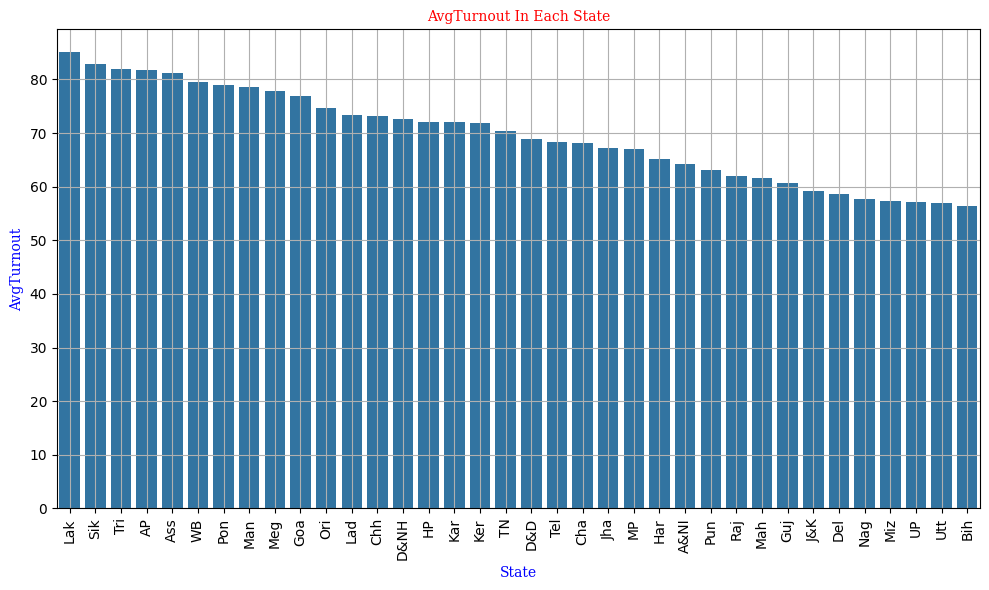

In [ ]:
temp_df = election_res.groupby(['stateabr'])['Turnout'].mean().rename('AvgTurnout').reset_index()
sorted_df = temp_df.sort_values(by='AvgTurnout',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=sorted_df,x='stateabr',y='AvgTurnout')
plt.xticks(rotation=90)
plt.xlabel('State',color='blue',font='serif')
plt.ylabel('AvgTurnout',color='blue',font='serif')
plt.title('AvgTurnout In Each State',color='red',font='serif')
plt.grid()
plt.tight_layout()
plt.show()

### Insights:
- **Highest turnout**: Lakshadweep, Sikkim, Tripura, Andhra Pradesh – above 80%.
- **Lowest turnout**: Bihar, Uttar Pradesh, Uttarakhand – around 56–58%.
- **High turnout states** are often smaller or northeastern states where voter participation is traditionally strong.
- **Low turnout states** include some of the largest ones, which can significantly impact national results.


In [ ]:
# SEATS WHERE BJP FIGHTS
bjpfightseats = pd.Series(['Andaman & Nicobar Islands - 1', 'Anakapalle - 5',
       'Araku - 1', 'Narsapuram - 9', 'Rajahmundry - 8',
       'Rajampet - 24', 'Thirupathi - 23', 'Arunachal East - 2',
       'Arunachal West - 1', 'Darrang-Udalguri - 4', 'Dibrugarh - 13',
       'Diphu - 6', 'Guwahati - 5', 'Jorhat - 14', 'Karimganj - 7',
       'Kaziranga - 10', 'Lakhimpur - 12', 'Nagaon - 9', 'Silchar - 8',
       'Sonitpur - 11', 'Araria - 9', 'Arrah - 32', 'Aurangabad - 37',
       'Begusarai - 24', 'Buxar - 33', 'Darbhanga - 14', 'Madhubani - 6',
       'Maharajganj - 19', 'Muzaffarpur - 15', 'Nawada - 39',
       'Paschim Champaran - 2', 'Patliputra - 31', 'Patna Sahib - 30',
       'Purvi Champaran - 3', 'Saran - 20', 'Sasaram - 34',
       'Ujiarpur - 22', 'Chandigarh - 1', 'BASTAR - 10', 'BILASPUR - 5',
       'DURG - 7', 'JANJGIR-CHAMPA - 3', 'KANKER - 11', 'KORBA - 4',
       'MAHASAMUND - 9', 'RAIGARH - 2', 'RAIPUR - 8', 'RAJNANDGAON - 6',
       'SURGUJA - 1', 'Dadar & Nagar Haveli - 2', 'Daman & Diu - 1',
       'North Goa - 1', 'South Goa - 2', 'Ahmedabad East - 7',
       'Ahmedabad West - 8', 'Amreli - 14', 'Anand - 16',
       'Banaskantha - 2', 'Bardoli - 23', 'Bharuch - 22',
       'Bhavnagar - 15', 'Chhota Udaipur - 21', 'Dahod - 19',
       'Gandhinagar - 6', 'Jamnagar - 12', 'Junagadh - 13', 'Kachchh - 1',
       'Kheda - 17', 'Mahesana - 4', 'Navsari - 25', 'Panchmahal - 18',
       'Patan - 3', 'Porbandar - 11', 'Rajkot - 10', 'Sabarkantha - 5',
       'Surendranagar - 9', 'Vadodara - 20', 'Valsad - 26', 'AMBALA - 1',
       'BHIWANI-MAHENDRAGARH - 8', 'FARIDABAD - 10', 'GURGAON - 9',
       'HISAR - 4', 'KARNAL - 5', 'KURUKSHETRA - 2', 'ROHTAK - 7',
       'SIRSA - 3', 'SONIPAT - 6', 'HAMIRPUR - 3', 'KANGRA - 1',
       'MANDI - 2', 'SHIMLA - 4', 'JAMMU - 5', 'UDHAMPUR - 4',
       'Chatra - 4', 'Dhanbad - 7', 'Dumka - 2', 'Godda - 3',
       'Hazaribagh - 14', 'Jamshedpur - 9', 'Khunti - 11', 'Kodarma - 5',
       'Lohardaga - 12', 'Palamau - 13', 'Rajmahal - 1', 'Ranchi - 8',
       'Singhbhum - 10', 'Bagalkot - 3', 'Bangalore North - 24',
       'Bangalore Rural - 23', 'Bangalore South - 26',
       'Bangalore central - 25', 'Belgaum - 2', 'Bellary - 9',
       'Bidar - 7', 'Bijapur - 4', 'Chamarajanagar - 22',
       'Chikkballapur - 27', 'Chikkodi - 1', 'Chitradurga - 18',
       'Dakshina Kannada - 17', 'Davanagere - 13', 'Dharwad - 11',
       'Gulbarga - 5', 'Haveri - 10', 'Koppal - 8', 'Mysore - 21',
       'Raichur - 6', 'Shimoga - 14', 'Tumkur - 19',
       'Udupi Chikmagalur - 15', 'Uttara Kannada - 12', 'Alappuzha - 15',
       'Alathur - 9', 'Attingal - 19', 'Ernakulam - 12', 'Kannur - 2',
       'Kasaragod - 1', 'Kollam - 18', 'Kozhikode - 5', 'Malappuram - 6',
       'Palakkad - 8', 'Pathanamthitta - 17', 'Ponnani - 7',
       'Thiruvananthapuram - 20', 'Thrissur - 10', 'Vadakara - 3',
       'Wayanad - 4', 'Ladakh - 1', 'BALAGHAT - 15', 'BETUL - 29',
       'BHIND - 2', 'BHOPAL - 19', 'CHHINDWARA - 16', 'DAMOH - 7',
       'DEWAS - 21', 'DHAR - 25', 'GUNA - 4', 'GWALIOR - 3',
       'HOSHANGABAD - 17', 'INDORE - 26', 'JABALPUR - 13',
       'KHAJURAHO - 8', 'KHANDWA - 28', 'KHARGONE - 27', 'MANDLA - 14',
       'MANDSOUR - 23', 'MORENA - 1', 'RAJGARH - 20', 'RATLAM - 24',
       'REWA - 10', 'SAGAR - 5', 'SATNA - 9', 'SHAHDOL - 12',
       'SIDHI - 11', 'TIKAMGARH - 6', 'UJJAIN - 22', 'VIDISHA - 18',
       'Ahmednagar - 37', 'Akola - 6', 'Amravati - 7', 'Beed - 39',
       'Bhandara Gondiya - 11', 'Bhiwandi - 23', 'Chandrapur - 13',
       'Dhule - 2', 'Dindori - 20', 'Gadchiroli - Chimur - 12',
       'Jalgaon - 3', 'Jalna - 18', 'Latur - 41', 'Madha - 43',
       'Mumbai North - 26', 'Mumbai North Central - 29',
       'Mumbai North East - 28', 'Nagpur - 10', 'Nanded - 16',
       'Nandurbar - 1', 'Palghar - 22', 'Pune - 34',
       'Ratnagiri- Sindhudurg - 46', 'Raver - 4', 'Sangli - 44',
       'Satara - 45', 'Solapur - 42', 'Wardha - 8', 'Inner Manipur - 1',
       'MIZORAM - 1', 'Chandni Chowk - 1', 'East Delhi - 3',
       'New Delhi - 4', 'North-East Delhi - 2', 'North-West Delhi - 5',
       'South Delhi - 7', 'West Delhi - 6', 'Aska - 19', 'Balasore - 6',
       'Bargarh - 1', 'Berhampur - 20', 'Bhadrak - 7', 'Bhubaneswar - 18',
       'Bolangir - 10', 'Cuttack - 14', 'Dhenkanal - 9',
       'Jagatsinghpur - 16', 'Jajpur - 8', 'Kalahandi - 11',
       'Kandhamal - 13', 'Kendrapara - 15', 'Keonjhar - 4',
       'Koraput - 21', 'Mayurbhanj - 5', 'Nabarangpur - 12', 'Puri - 17',
       'Sambalpur - 3', 'Sundargarh - 2', 'PUDUCHERRY - 1',
       'Amritsar - 2', 'Anandpur Sahib - 6', 'Bathinda - 11',
       'Faridkot - 9', 'Fatehgarh Sahib - 8', 'Firozpur - 10',
       'Gurdaspur - 1', 'Hoshiarpur - 5', 'Jalandhar - 4',
       'Khadoor Sahib - 3', 'Ludhiana - 7', 'Patiala - 13',
       'Sangrur - 12', 'AJMER - 13', 'ALWAR - 8', 'BANSWARA - 20',
       'BARMER - 17', 'BHARATPUR - 9', 'BHILWARA - 23', 'BIKANER - 2',
       'CHITTORGARH - 21', 'CHURU - 3', 'DAUSA - 11', 'GANGANAGAR - 1',
       'JAIPUR - 7', 'JAIPUR RURAL - 6', 'JALORE - 18',
       'JHALAWAR-BARAN - 25', 'JHUNJHUNU - 4', 'JODHPUR - 16',
       'KARAULI-DHOLPUR - 10', 'KOTA - 24', 'NAGAUR - 14', 'PALI - 15',
       'RAJSAMAND - 22', 'SIKAR - 5', 'TONK-SAWAI MADHOPUR - 12',
       'UDAIPUR - 19', 'Sikkim - 1', 'CHENNAI CENTRAL - 4',
       'CHENNAI NORTH - 2', 'CHENNAI SOUTH - 3', 'CHIDAMBARAM - 27',
       'COIMBATORE - 20', 'KANNIYAKUMARI - 39', 'KARUR - 23',
       'KRISHNAGIRI - 9', 'MADURAI - 32', 'NAGAPATTINAM - 29',
       'NAMAKKAL - 16', 'NILGIRIS - 19', 'PERAMBALUR - 25',
       'POLLACHI - 21', 'SIVAGANGA - 31', 'TENKASI - 37',
       'THANJAVUR - 30', 'TIRUNELVELI - 38', 'TIRUPPUR - 18',
       'TIRUVALLUR - 1', 'TIRUVANNAMALAI - 11', 'VELLORE - 8',
       'VIRUDHUNAGAR - 34', 'Adilabad - 1', 'Bhongir - 14',
       'Chevella - 10', 'Hyderabad - 9', 'Karimnagar - 3', 'Khammam - 17',
       'Mahabubabad - 16', 'Mahbubnagar - 11', 'Malkajgiri - 7',
       'Medak - 6', 'Nagarkurnool - 12', 'Nalgonda - 13', 'Nizamabad - 4',
       'Peddapalle - 2', 'Secunderabad - 8', 'Warangal - 15',
       'Zahirabad - 5', 'Tripura East - 2', 'Tripura West - 1',
       'Agra - 18', 'Akbarpur - 44', 'Aligarh - 15', 'Allahabad - 52',
       'Ambedkar Nagar - 55', 'Amethi - 37', 'Amroha - 9', 'Aonla - 24',
       'Azamgarh - 69', 'Badaun - 23', 'Baharaich - 56', 'Ballia - 72',
       'Banda - 48', 'Bansgaon - 67', 'Barabanki - 53', 'Bareilly - 25',
       'Basti - 61', 'Bhadohi - 78', 'Bulandshahr - 14', 'Chandauli - 76',
       'Deoria - 66', 'Dhaurahra - 29', 'Domariyaganj - 60', 'Etah - 22',
       'Etawah - 41', 'Faizabad - 54', 'Farrukhabad - 40',
       'Fatehpur - 49', 'Fatehpur Sikri - 19', 'Firozabad - 20',
       'Gautam Buddha Nagar - 13', 'Ghaziabad - 12', 'Ghazipur - 75',
       'Gonda - 59', 'Gorakhpur - 64', 'Hamirpur - 47', 'Hardoi - 31',
       'Hathras - 16', 'Jalaun - 45', 'Jaunpur - 73', 'Jhansi - 46',
       'Kairana - 2', 'Kaiserganj - 57', 'Kannauj - 42', 'Kanpur - 43',
       'Kaushambi - 50', 'Kheri - 28', 'Kushi Nagar - 65', 'Lalganj - 68',
       'Lucknow - 35', 'Machhlishahr - 74', 'Maharajganj - 63',
       'Mainpuri - 21', 'Mathura - 17', 'Meerut - 10', 'Misrikh - 32',
       'Mohanlalganj - 34', 'Moradabad - 6', 'Muzaffarnagar - 3',
       'Nagina - 5', 'Phulpur - 51', 'Pilibhit - 26', 'Pratapgarh - 39',
       'Rae Bareli - 36', 'Rampur - 7', 'Saharanpur - 1', 'Salempur - 71',
       'Sambhal - 8', 'Sant Kabir Nagar - 62', 'Shahjahanpur - 27',
       'Shrawasti - 58', 'Sitapur - 30', 'Sultanpur - 38', 'Unnao - 33',
       'Varanasi - 77', 'Almora - 3', 'Garhwal - 2', 'Haridwar - 5',
       'Nainital-Udhamsingh Nagar - 4', 'Tehri Garhwal - 1',
       'Alipurduars - 2', 'Arambagh - 29', 'Asansol - 40',
       'Baharampur - 10', 'Balurghat - 6', 'Bangaon - 14', 'Bankura - 36',
       'Barasat - 17', 'Bardhaman Purba - 38', 'Bardhaman-Durgapur - 39',
       'Barrackpur - 15', 'Basirhat - 18', 'Birbhum - 42',
       'Bishnupur - 37', 'Bolpur - 41', 'Coochbehar - 1',
       'Darjeeling - 4', 'Diamond harbour - 21', 'Dum dum - 16',
       'Ghatal - 32', 'Hooghly - 28', 'Howrah - 25', 'Jadavpur - 22',
       'Jalpaiguri - 3', 'Jangipur - 9', 'Jhargram - 33', 'Joynagar - 19',
       'Kanthi - 31', 'Kolkata Dakshin - 23', 'Kolkata Uttar - 24',
       'Krishnanagar - 12', 'Maldaha Dakshin - 8', 'Maldaha Uttar - 7',
       'Mathurapur - 20', 'Medinipur - 34', 'Murshidabad - 11',
       'Purulia - 35', 'Raiganj - 5', 'Ranaghat - 13', 'Srerampur - 27',
       'Tamluk - 30', 'Uluberia - 26'])

In [ ]:
bjpseats = bjpfightseats.str.split('- ').str.get(0).str.strip().str.lower().sort_values().values
election_res['PC Name'] = election_res['PC Name'].str.strip().str.lower()

### DUE TO SOME TYPOS , SOME CONSTITUENCY NAME MISMACHED WE NEED TO MAKE CORRECTION

In [ ]:
election_res[election_res['PC Name'].isin(bjpseats)].shape

(403, 12)

In [ ]:
os = election_res['PC Name'].sort_values().values


In [ ]:
! pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Replace these with your actual lists
l1 = os  # List of 542 constituencies from data1
l2 = bjpseats  # List of 440 BJP contested constituencies

# Store mismatched items
mismatched = []

# Loop through l2 and find best match in l1
for item in l2:
    best_match, score = process.extractOne(item, l1, scorer=fuzz.token_sort_ratio)
    if (score < 99)&(score>70):  # You can tweak this threshold
        mismatched.append((item, best_match, score))

# Show the mismatched results
for original, best, score in mismatched:
    print(f"L2: {original} | Closest L1: {best} | Similarity Score: {score}")

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


L2: ahmednagar | Closest L1: ahmadnagar | Similarity Score: 90
L2: anakapalle | Closest L1: anakapalli | Similarity Score: 90
L2: andaman & nicobar islands | Closest L1: andaman and nicobar islands | Similarity Score: 92
L2: araku | Closest L1: aruku | Similarity Score: 80
L2: bangalore central | Closest L1: bangalore cent | Similarity Score: 90
L2: bangalore north | Closest L1: bangalore nort | Similarity Score: 97
L2: bangalore rural | Closest L1: bangalore rura | Similarity Score: 97
L2: bangalore south | Closest L1: bangalore sout | Similarity Score: 97
L2: bardhaman purba | Closest L1: bardhaman purb | Similarity Score: 97
L2: bardhaman-durgapur | Closest L1: bardhaman purb | Similarity Score: 81
L2: barrackpur | Closest L1: barrackpore | Similarity Score: 86
L2: bhandara gondiya | Closest L1: bhandara - gon | Similarity Score: 86
L2: bhiwani-mahendragarh | Closest L1: bhiwani-mahend | Similarity Score: 82
L2: chennai central | Closest L1: chennai centra | Similarity Score: 97
L2:

In [ ]:
fix_dict = {wrong: correct for wrong, correct, _ in mismatched}
bjpseat = pd.Series(bjpseats).replace(fix_dict).values
bjpseat

array(['adilabad', 'agra', 'ahmedabad east', 'ahmedabad west',
       'ahmadnagar', 'ajmer', 'akbarpur', 'akola', 'alappuzha', 'alathur',
       'aligarh', 'alipurduars', 'allahabad', 'almora', 'alwar', 'ambala',
       'ambedkar nagar', 'amethi', 'amravati', 'amreli', 'amritsar',
       'amroha', 'anakapalli', 'anand', 'anandpur sahib',
       'andaman and nicobar islands', 'aonla', 'aruku', 'arambagh',
       'araria', 'arrah', 'arunachal east', 'arunachal west', 'asansol',
       'aska', 'attingal', 'aurangabad', 'azamgarh', 'badaun', 'bagalkot',
       'baharaich', 'baharampur', 'balaghat', 'balasore', 'ballia',
       'balurghat', 'banaskantha', 'banda', 'bangalore cent',
       'bangalore nort', 'bangalore rura', 'bangalore sout', 'bangaon',
       'bankura', 'bansgaon', 'banswara', 'barabanki', 'barasat',
       'bardhaman purb', 'bardhaman purb', 'bardoli', 'bareilly',
       'bargarh', 'barmer', 'barrackpore', 'basirhat', 'bastar', 'basti',
       'bathinda', 'beed', 'begusara

In [ ]:
election_res[election_res['PC Name'].isin(bjpseat)].shape

(437, 12)

### ALL THOUGH CORRECTION MADE 3 SEATS LOSSED

In [ ]:
main_df = election_res[election_res['PC Name'].isin(bjpseat)]
main_df.head()

1,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %,stateabr
0,adilabad,1,ST,Telangana,Godam Nagesh,Bharatiya Janta Party,1650175,1235597,74.9,90652,7.3,Tel
1,agra,18,SC,Uttar Pradesh [2000 Onwards],Prof S P Singh Baghel,Bharatiya Janta Party,2072685,1123779,54.2,271294,24.1,UP
2,ahmadnagar,37,GEN,Maharashtra,Nilesh Dnyandev Lanke,Nationalist Congress Party – Sharadchandra Pawar,1981866,1325477,66.9,28929,2.2,Mah
3,ahmedabad east,7,GEN,Gujarat,Hasmukhbhai Patel (H.S.PATEL),Bharatiya Janta Party,2038162,1128339,55.4,461755,40.9,Guj
4,ahmedabad west,8,SC,Gujarat,Dineshbhai Makwana (ADVOCATE),Bharatiya Janta Party,1726987,966646,56.0,286437,29.6,Guj


### AVG TRUNOUT WHERE BJP WON AND LOSS

Text(0.5, 1.0, 'AvgTurnout Where BJP Loss')

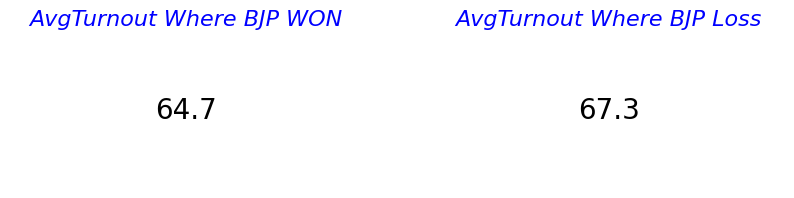

In [ ]:
wonturn = main_df[main_df['Party']=='Bharatiya Janta Party']['Turnout'].median()
lossturn = main_df[main_df['Party']!='Bharatiya Janta Party']['Turnout'].median()

figure,ax = plt.subplots(figsize=(10, 2),nrows=1,ncols=2,)
ax[0].text(0.5, 0.5, f"{wonturn}", fontsize=20, ha='center', va='center')
ax[0].axis('off')
ax[0].set_title("AvgTurnout Where BJP WON",fontsize=16,color='blue',fontstyle='italic')

ax[1].text(0.5, 0.5, f"{lossturn}", fontsize=20, ha='center', va='center')
ax[1].axis('off')
ax[1].set_title("AvgTurnout Where BJP Loss", fontsize=16,color='blue',fontstyle='italic')


##  Voter Turnout – Impact on BJP Performance

### Key Insights:
- **Avg. Turnout where BJP won:** 64.7%
- **Avg. Turnout where BJP lost:** 67.3%

### Why it matters:
- Higher turnout in loss seats suggests that **increased voter participation favored the opposition**.
- In BJP strongholds, turnout was slightly lower, meaning BJP’s base was stable but not heavily expanded.


### STATE WISE TURNOUT

In [ ]:
# STATE WISE
temp1 = main_df[main_df['Party']=='Bharatiya Janta Party'].groupby('stateabr')['Turnout'].mean().rename('Turn_W').reset_index()
temp2 = main_df[main_df['Party']!='Bharatiya Janta Party'].groupby('stateabr')['Turnout'].mean().rename('Turn_L').reset_index()
temp_df = pd.merge(temp1,temp2,on='stateabr',how='outer')
temp3 = election_res.groupby('stateabr')['Turnout'].mean().rename('StateAvgTurnout').reset_index()
final_df = pd.merge(temp_df,temp3,on='stateabr',how='outer').sort_values(by='StateAvgTurnout',ascending=False).fillna(0)
final_df.head()

,stateabr,Turn_W,Turn_L,StateAvgTurnout
18,Lak,0.00,0.000000,85.100000
29,Sik,0.00,82.900000,82.900000
32,Tri,81.95,0.000000,81.950000
1,AP,82.36,78.266667,81.729630
2,Ass,78.80,82.950000,81.185714


In [ ]:
temp_df = final_df.melt(id_vars='stateabr',value_vars=['Turn_W','Turn_L','StateAvgTurnout'],var_name='Type',value_name='Turnout')

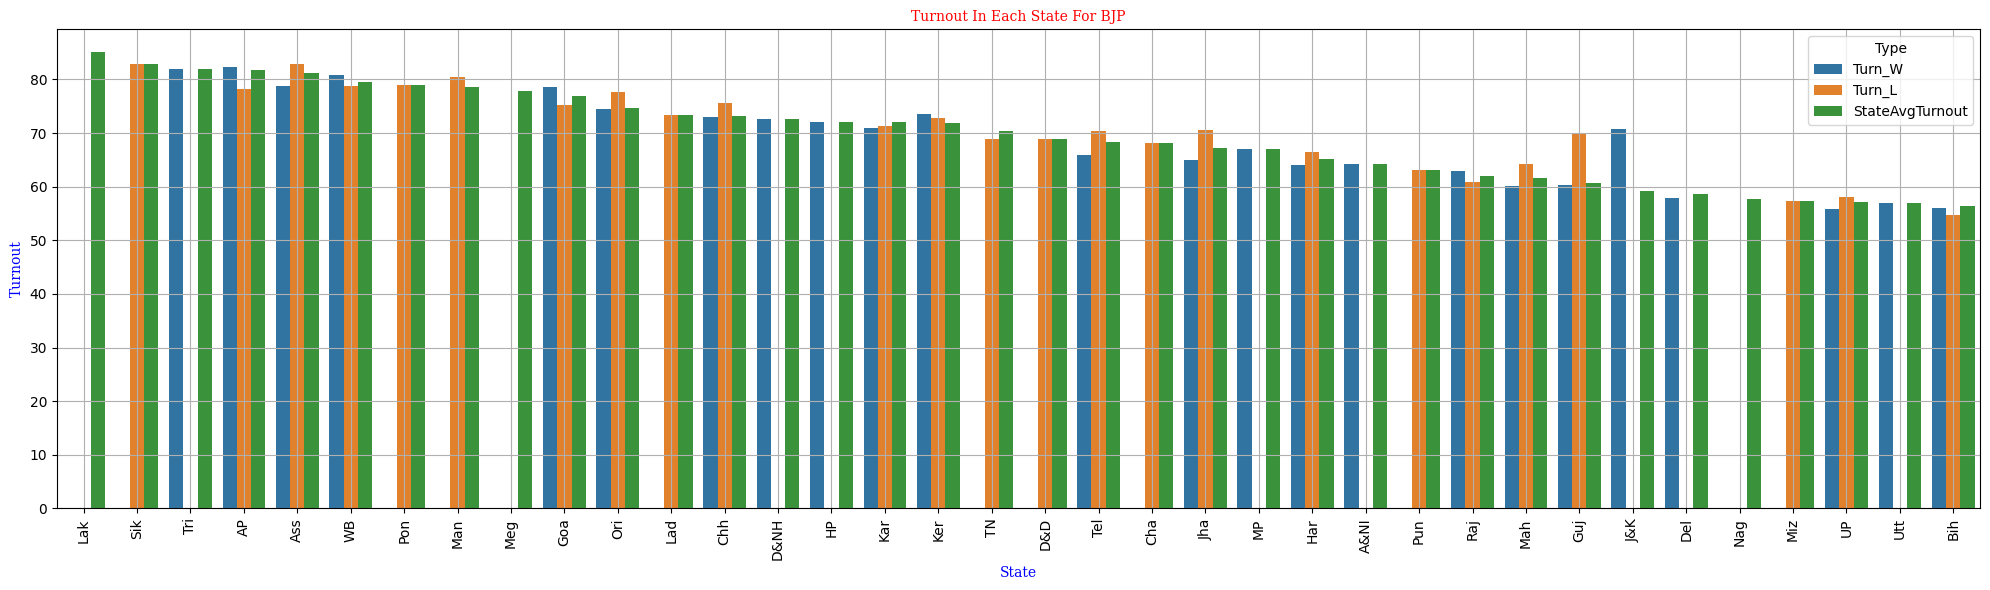

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=temp_df,x='stateabr',y='Turnout',hue='Type')
plt.xticks(rotation=90)
plt.xlabel('State',color='blue',font='serif')
plt.ylabel('Turnout',color='blue',font='serif')
plt.title('Turnout In Each State For BJP',color='red',font='serif')
plt.grid()
plt.tight_layout()
plt.show()

## 🗳️ BJP – Voter Turnout in Won vs Lost Seats (by State)

### Key Insights:
- **Blue bars (Turn_W)**: Average turnout in seats BJP won.
- **Orange bars (Turn_L)**: Average turnout in seats BJP lost.
- **Green bars (StateAvgTurnout)**: Overall state average turnout.

### Observations:
1. In many states, **turnout was higher in lost seats** (e.g., UP, Bihar, Maharashtra), suggesting higher participation favored opposition parties.
2. In BJP stronghold states (e.g., Gujarat, MP, Tripura), turnout differences between wins and losses were small.
3. States with **low state average turnout** (e.g., UP, Bihar, Uttarakhand) offer room for BJP to improve results by mobilizing more voters.

### Why it matters:
- Higher turnout in opposition-favored seats hints at **effective voter mobilization by rivals**.
- BJP could focus on **increasing turnout in its weaker states** to gain more seats in future elections.


# SEAT TYPE

In [ ]:
main_df['Type'] = main_df['Type'].fillna('GEN')

/tmp/ipython-input-2697211569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Type'] = main_df['Type'].fillna('GEN')


In [ ]:
t1 = main_df.groupby('Type')['PC Name'].count().rename('TotalSeats').reset_index()
t2 = main_df[main_df['Party']=='Bharatiya Janta Party'].groupby('Type')['PC Name'].count().rename('WonSeats').reset_index()
t3 = pd.merge(t1,t2,how='outer',on='Type')
t3['Win%'] = (t3['WonSeats']/t3['TotalSeats'])*100
t4 = election_res.groupby('Type')['Turnout'].mean().rename('CastOverallTurn').reset_index()
final_df = pd.merge(t3,t4,how='outer',on='Type')


t5 = main_df[main_df['Party']=='Bharatiya Janta Party'].groupby('Type')['Margin %'].mean().rename('AvgWinMargin%').reset_index()
t6 = main_df[main_df['Party']!='Bharatiya Janta Party'].groupby('Type')['Margin %'].mean().rename('AvgLossMargin%').reset_index()
final_df = pd.merge(final_df,t5,how='outer')
final_df = pd.merge(final_df,t6,how='outer')
final_df.fillna(0,inplace=True)
final_df

,Type,TotalSeats,WonSeats,Win%,CastOverallTurn,AvgWinMargin%,AvgLossMargin%
0,GEN,327,182,55.657492,65.521094,16.281868,10.731724
1,GENP,2,2,100.000000,81.750000,17.300000,0.000000
2,SC,67,29,43.283582,66.517857,12.503448,10.823684
3,ST,41,24,58.536585,72.432609,15.829167,12.994118


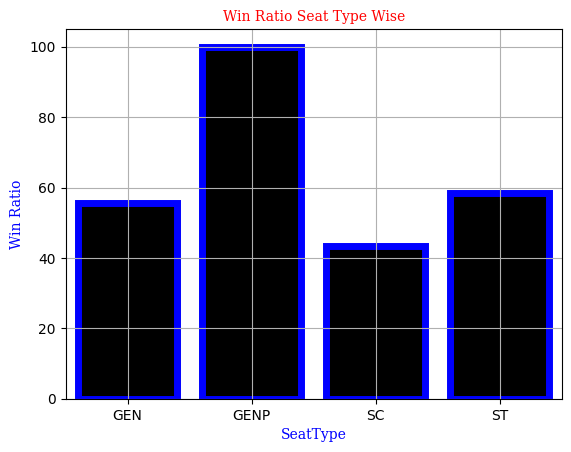

In [ ]:
sns.barplot(data=final_df,x='Type',y='Win%',color='Black',edgecolor='blue',linewidth=5)
plt.title('Win Ratio Seat Type Wise',color='red',font='serif')
plt.xlabel('SeatType',color='blue',font='serif')
plt.ylabel('Win Ratio',color='blue',font='serif')
plt.grid()

##  BJP Win Ratio by Seat Type – Lok Sabha 2024

### Insights:
- **GENP (General – Non-Reserved):** ~100% win ratio → BJP dominated these seats.
- **ST (Scheduled Tribe Reserved):** ~58% win ratio → Strong but not dominant.
- **GEN (General Reserved):** ~56% win ratio → Moderate performance.
- **SC (Scheduled Caste Reserved):** ~43% win ratio → Weakest category for BJP.

### Why it matters:
- BJP’s **core strength** lies in **General – Non-Reserved** seats.
- **Lower performance in SC-reserved seats** suggests weaker outreach in Dalit-dominated constituencies.
- Improving SC and ST performance could provide significant additional seats in future elections.


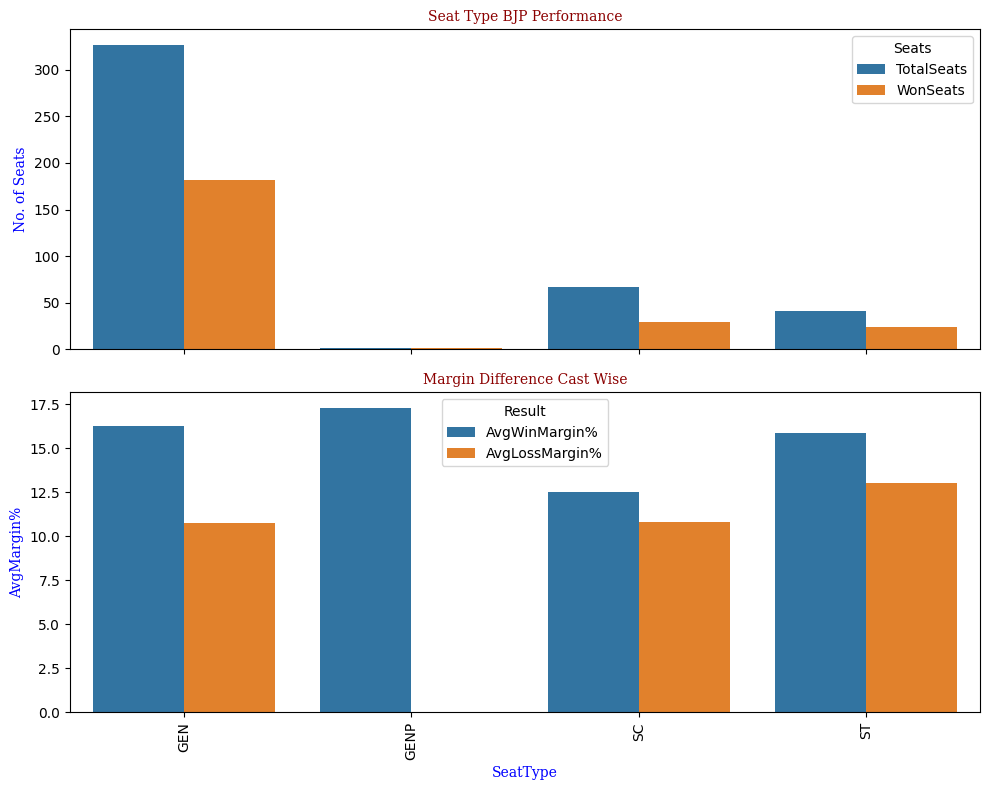

In [ ]:
melt1 = final_df.melt(id_vars='Type',value_vars=['TotalSeats','WonSeats'],var_name='Seats',value_name='Count')
melt2 = final_df.melt(id_vars='Type',value_vars=['AvgWinMargin%','AvgLossMargin%'],var_name='Result',value_name='Margin%')

fig,ax = plt.subplots(figsize=(10,8),nrows=2,ncols=1,sharex=True)
sns.barplot(data=melt1, x='Type', y='Count', hue='Seats',ax=ax[0])
ax[0].tick_params(axis='x',rotation=90)
ax[0].set_title('Seat Type BJP Performance',size=20,font='serif',color='darkred')
ax[0].set_ylabel('No. of Seats',font='serif',color='blue')
ax[0].set_xlabel('SeatType',font='serif',color='blue')

sns.barplot(data=melt2,x='Type',y='Margin%',hue='Result',ax=ax[1])
ax[1].tick_params(axis='x',rotation=90)
ax[1].set_title('Margin Difference Cast Wise',size=20,font='serif',color='darkred')
ax[1].set_ylabel('AvgMargin%',font='serif',color='blue')
ax[1].set_xlabel('SeatType',font='serif',color='blue')

plt.tight_layout()
plt.show()

##  BJP Performance by Seat Type & Margin

### Seat Type Performance:
- **GEN (General):** Most seats fought, but less than 60% won.
- **GENP (General Non-Reserved):** Nearly **100% win rate** → BJP’s strongest category.
- **SC (Scheduled Caste Reserved):** Lowest win rate (~43%).
- **ST (Scheduled Tribe Reserved):** Moderate win rate (~58%).

### Margin Insights:
- **GENP seats** have the **highest average win margin** → Strong voter support base.
- **SC seats** have **lowest win margins** → Highly competitive and opposition strong.
- **ST seats** show **close margins** in both wins and losses → Swing potential.
- **GEN seats** have decent margins but many were still lost → Indicates regional competition.

### Why it matters:
- BJP’s dominance in **GENP seats** is clear, but **SC and ST reserved constituencies** are critical weak spots.
- Improving performance in SC/ST seats could add significant seats in future elections.
- Focused strategy needed for **GEN seats with close margins** to avoid slipping further.


# STATE WISE AND SEATTYPE WISE BJP PERFORMANCE

In [ ]:
# STATE WISE AND CAST WISE BJP PERFORMANCE
t1 = main_df.groupby(['State','Type'])['PC Name'].count().rename('NSeats').reset_index()
t2 = main_df[main_df['Party']=='Bharatiya Janta Party'].groupby(['State','Type'])['PC Name'].count().rename('WONSeats').reset_index()
t3 = pd.merge(t1,t2,on=['State','Type'],how='outer').fillna(0)
t3['Win%'] = round((t3['WONSeats']/t3['NSeats'])*100,2)
t4 = main_df[main_df['Party']=='Bharatiya Janta Party'].groupby(['State','Type'])['Margin %'].mean().rename('AvgWinMargin%').reset_index()
t5 = main_df[main_df['Party']!='Bharatiya Janta Party'].groupby(['State','Type'])['Margin %'].mean().rename('AvgLossMargin%').reset_index()
t6 = pd.merge(t3,t4,how='outer',on=['State','Type'])
t7 = pd.merge(t6,t5,how='outer',on=['State','Type']).fillna(0)
t8 = main_df.groupby(['State','Type'])['Turnout'].mean().rename('AvgTurnout').reset_index()
t9 = pd.merge(t7,t8,how='outer',on=['State','Type'])
t9.head()

,State,Type,NSeats,WONSeats,Win%,AvgWinMargin%,AvgLossMargin%,AvgTurnout
0,Andaman & Nicobar Islands,GEN,1,1.0,100.0,12.000000,0.0,64.300
1,Andhra Pradesh [2014 Onwards],GEN,4,3.0,75.0,20.966667,5.7,82.075
2,Andhra Pradesh [2014 Onwards],SC,1,0.0,0.0,0.000000,1.1,79.900
3,Andhra Pradesh [2014 Onwards],ST,1,0.0,0.0,0.000000,4.3,74.900
4,Arunachal Pradesh,GENP,2,2.0,100.0,17.300000,0.0,81.750


<Figure size 1000x1000 with 0 Axes>

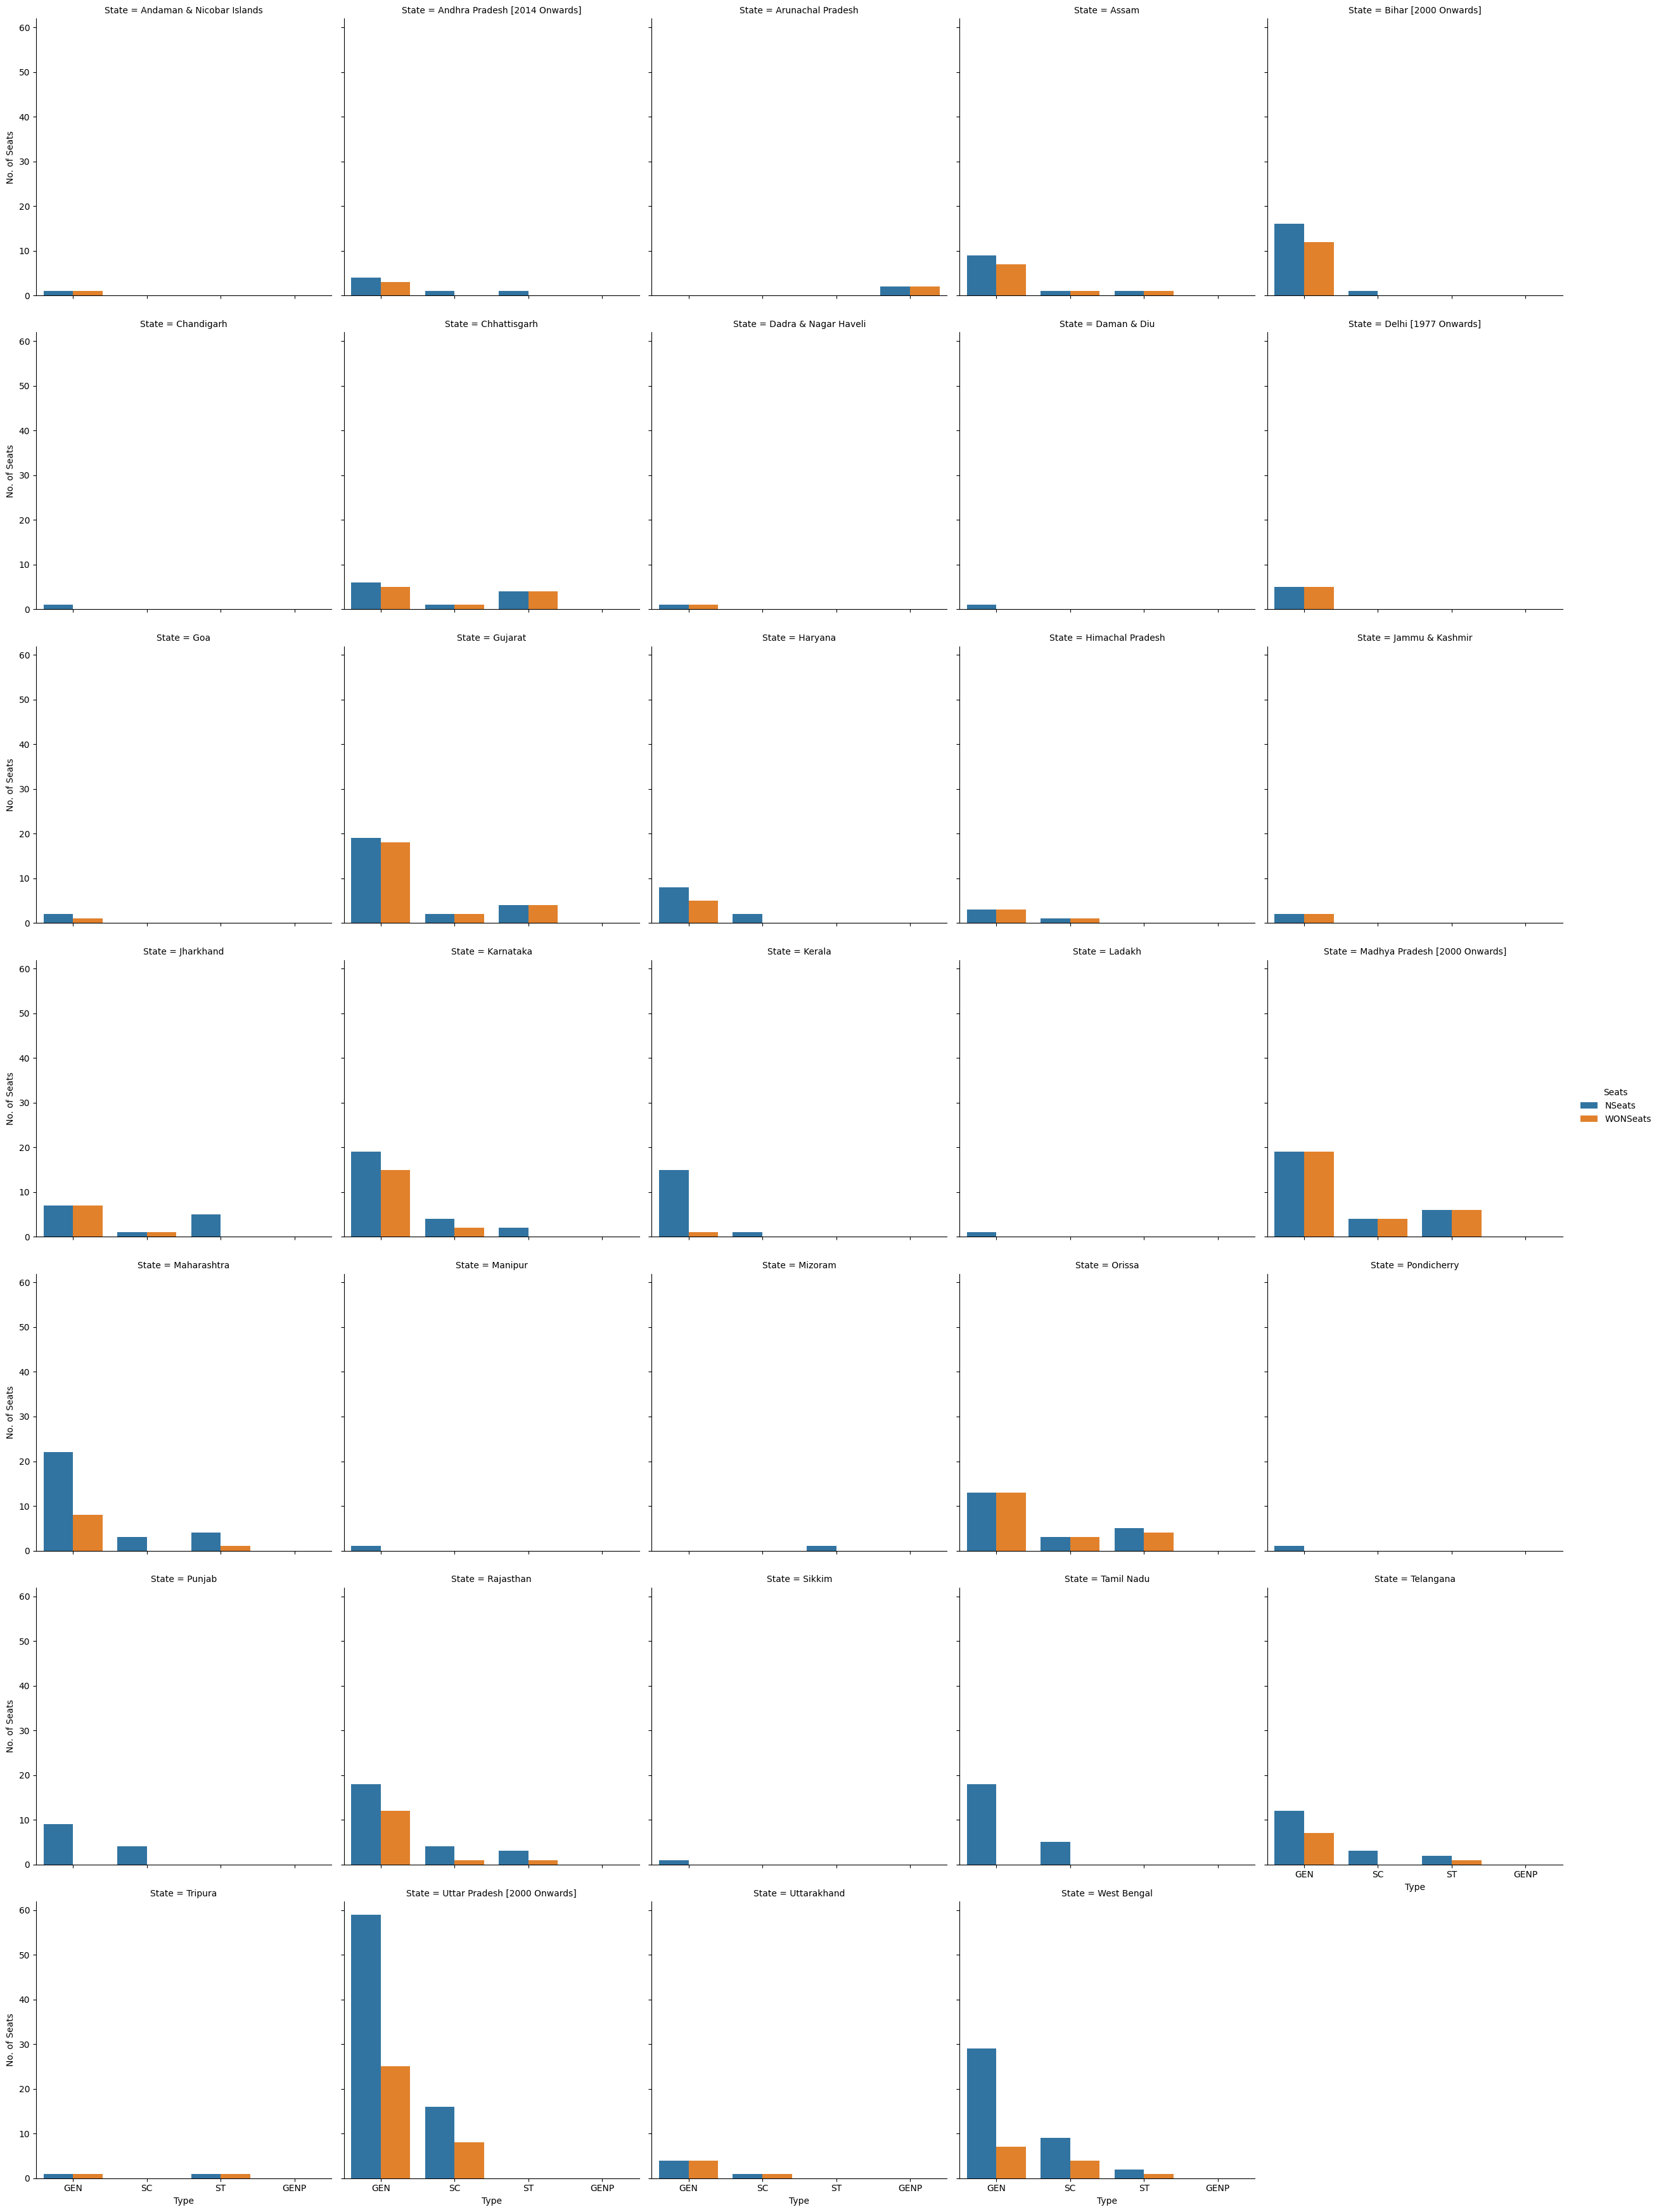

In [ ]:
plt.figure(figsize=(10,10))
melt1 = t9.melt(id_vars=['State','Type'],value_vars=['NSeats','WONSeats'],var_name='Seats',value_name='No. of Seats')
sns.catplot(data=melt1,x='Type',y='No. of Seats',hue='Seats',col='State',kind='bar',col_wrap=5)

##  BJP Performance by Seat Type in Each State

### Key Observations:
- **Gujarat, MP, Tripura, Himachal, Arunachal:** Strong performance in almost all seat types → Consistent dominance.
- **Bihar, Maharashtra, UP, West Bengal:** Lost significant SC/ST and some GEN seats → Major reason for reduced majority.
- **Southern states (TN, Kerala, Andhra Pradesh):** Minimal presence across all seat types → Weak voter base.
- **North-East states (Arunachal, Tripura, Manipur):** Strong showing in GEN/GENP seats.
- **Punjab, Tamil Nadu, Puducherry:** No major wins in any seat category.

### Why it matters:
- BJP’s strength is concentrated in **core states and GEN/GENP seats**.
- **SC/ST reserved seats** in high-population states are a major opportunity area.
- To regain majority, BJP must **expand beyond traditional support bases** and improve outreach in weak regions.


# REGIONAL PARTIES ARE THREAT FOR BJP?

In [ ]:
all_parties = {
    'Shiromani Akali Dal': 'Regional',
    'All India Majlis-e-Ittehadul Muslimeen': 'Regional',
    'Jammu & Kashmir National Conference': 'Regional',
    'All India Forward Bloc': 'Regional',
    'Revolutionary Socialist Party': 'Regional',
    'Indian Union Muslim League': 'Regional',
    'Dravida Munnetra Kazhagam': 'Regional',
    'Mizo National Front': 'Regional',
    'Maharashtrawadi Gomantak Party': 'Regional',
    'Shiv Sena': 'Regional',
    'Hill State People’s Democratic Party': 'Regional',
    'Mizoram People’s Conference': 'Regional',
    'United Democratic Party': 'Regional',
    'All India Anna Dravida Munnetra Kazhagam': 'Regional',
    'Jharkhand Mukti Morcha': 'Regional',
    'Communist Party of India–Marxist–Leninist Liberation': 'Regional',
    'People’s Party of Arunachal': 'Regional',
    'Kerala Congress (M)': 'Regional',
    'Jammu & Kashmir National Panthers Party': 'Regional',
    'Asom Gana Parishad': 'Regional',
    'Bodoland People’s Front': 'Regional',
    'All Jharkhand Students Union': 'Regional',
    'Telugu Desam Party': 'Regional',
    'Pattali Makkal Katchi': 'Regional',
    'Samajwadi Janata Party (Rashtriya)': 'Regional',
    'Samajwadi Party': 'Regional',
    'Sikkim Democratic Front': 'Regional',
    'Zoram Nationalist Part': 'Regional',
    'Rashtriya Janata Dal': 'Regional',
    'Biju Janata Dal': 'Regional',
    'Jammu and Kashmir People’s Democratic Party': 'Regional',
    'Indian National Lok Dal': 'Regional',
    'Janata Dal (Secular)': 'Regional',
    'Janata Dal (United)': 'Regional',
    'Lok Janshakti Party': 'Regional',
    'Telangana Rashtra Samithi': 'Regional',
    'Naga People’s Front': 'Regional',
    'All India United Democratic Front': 'Regional',
    'Desiya Murpokku Dravidar Kazhagam': 'Regional',
    'Maharashtra Navnirman Sena': 'Regional',
    'Indigenous People’s Front of Tripura': 'Regional',
    'YSR Congress Party': 'Regional',
    'All India N.R. Congress': 'Regional',
    'Aam Aadmi Party': 'Regional',
    'Sikkim Krantikari Morcha': 'Regional',
    'United People’s Party Liberal': 'Regional',
    'Janta Congress Chhattisgarh': 'Regional',
    'Goa Forward Party': 'Regional',
    'Nationalist Democratic Progressive Party': 'Regional',
    'People’s Democratic Front': 'Regional',
    'Jan Nayak Janta Party': 'Regional',
    'Rashtriya Loktantrik Party': 'Regional',
    'Indian National Congress': 'National',
    'Communist Party of India': 'National',
    'Communist Party of India- Marxist': 'National',
    'Bharatiya Janata Party': 'National',
    'Bahujan Samaj Party': 'National',
    'All India Trinamool Congress': 'National',
    'Nationalist Congress Party': 'National',
    'National People’s Party': 'National'
}
t1 = all_parties.keys()

In [ ]:
t2 = election_res["Party"].unique()


In [ ]:
def PartyType(election_res):
    party_type_map = {
        'Bharatiya Janta Party': 'National',
        'Indian National Congress': 'National',
        'Communist Party Of India (Marxist)': 'National',
        'Communist Party Of India (Marxist-Leninist) (Liberation)': 'National',
        'Communist Party Of India': 'National',
        'Nationalist Congress Party': 'National',
        'Aam Aadmi Party': 'National',

        'Nationalist Congress Party – Sharadchandra Pawar': 'Regional',
        'All India Trinamool Congress': 'Regional',
        'Telugu Desam': 'Regional',
        'Samajwadi Party': 'Regional',
        'Jammu & Kashmir National Conference': 'Regional',
        'Dravida Munnetra Kazhagam': 'Regional',
        'Yuvajana Sramika Rythu Congress Party': 'Regional',
        'Shiv Sena': 'Regional',
        'Rashtriya Janata Dal': 'Regional',
        'Rashtriya Lok Dal': 'Regional',
        'Janata Dal (United)': 'Regional',
        'Bharat Adivasi Party': 'Regional',
        'Asom Gana Parishad': 'Regional',
        'Shiromani Akali Dal': 'Regional',
        'Lok Janshakti Party(Ram Vilas)': 'Regional',
        'Shiv Sena (Uddhav Balasaheb Thackrey)': 'Regional',
        'All India Majlis-E-Ittehadul Muslimeen': 'Regional',
        'United Peoples Party Liberal': 'Regional',
        'Janata Dal (Secular)': 'Regional',
        'Revolutionary Socialist Party': 'Regional',
        'Kerala Congress': 'Regional',
        'Indian Union Muslim League': 'Regional',
        'Sikkim Krantikari Morcha': 'Regional',
        'Marumalarchi Dravida Munnetra Kazhagam': 'Regional'
    }

    # Use map() and fillna() for fallback
    election_res['PartyType'] = election_res['Party'].map(party_type_map).fillna('Unrecognized')

    return election_res


In [ ]:
election_res = PartyType(election_res)

In [ ]:
def partyabr(partyname):
  l = partyname.split(' ')
  if len(l)<=1:
    abr = l[0]
  else:
    abr = ''.join([i[0] for i in l])
  return abr

election_res['PartyAbr'] = election_res['Party'].apply(partyabr)

BJP TOTAL CANDIDATES : 437


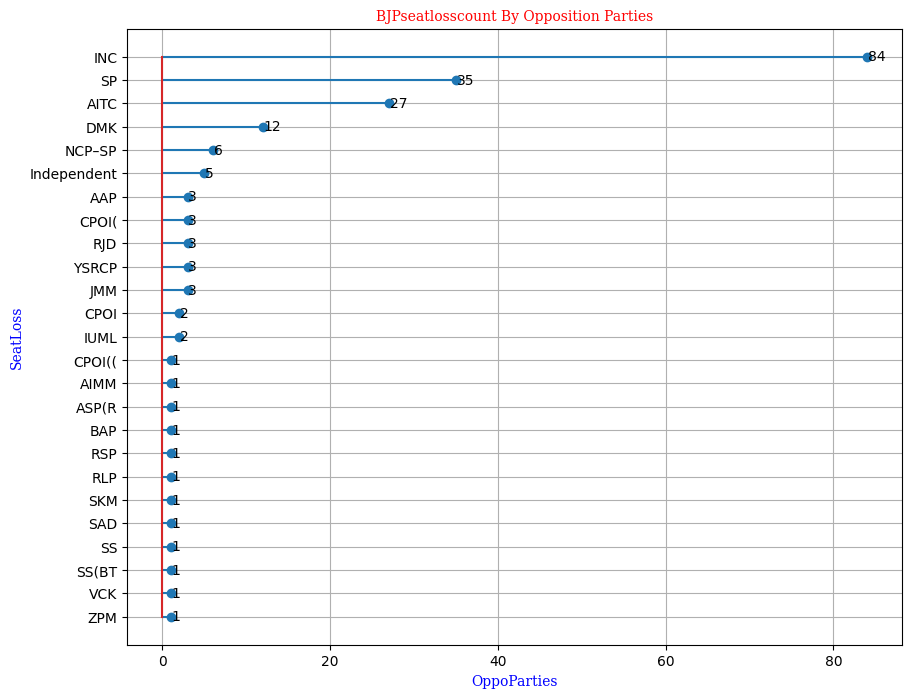

In [ ]:
# Sheat where Bjp Fight
temp = election_res[election_res['PC Name'].isin(bjpseat)]
print(f"BJP TOTAL CANDIDATES : {temp.shape[0]}")
# BJP LOSSED  SEATS
t1 = temp[temp['PartyAbr']!='BJP']
df1 = t1.groupby('PartyAbr')['PartyAbr'].count().rename('BJPseatlosscount').reset_index().sort_values('BJPseatlosscount',ascending=False)
plt.figure(figsize=(10,8))
plt.stem(df1['PartyAbr'][::-1],df1['BJPseatlosscount'][::-1],orientation='horizontal')
#plt.xticks(size=8)
plt.xlabel('OppoParties',color='blue',font='serif')
plt.ylabel('SeatLoss',color='blue',font='serif')
plt.title('BJPseatlosscount By Opposition Parties',color='red',font='serif')
plt.grid()
for i in range(len(df1)):
    plt.text(
        df1['BJPseatlosscount'][::-1].iloc[i]+0.1,
        i,
        str(round(df1['BJPseatlosscount'][::-1].iloc[i],2)),
        va='center',
        fontsize=10,
        color='black'
    )
plt.show()

##  BJP Seat Losses by Opposition Parties

### Key Observations:
- **INC (Congress)**: Biggest challenger, defeating BJP in **84 seats**.
- **SP (Samajwadi Party)**: Strong in UP, defeating BJP in **35 seats**.
- **AITC (TMC)**: Took **27 seats**, mainly in West Bengal.
- **DMK**: Dominated Tamil Nadu, taking **12 seats** from BJP.
- Other regional forces like **NCP-SP, AAP, RJD, YSRCP** also caused multiple losses.

### Why it matters:
- BJP’s losses are heavily concentrated in **states where regional parties are strong**.
- Alliance strategies and regional outreach are crucial to countering:
  - **INC in central & northern India**
  - **SP in UP**
  - **TMC in West Bengal**
  - **DMK in Tamil Nadu**


Text(0.5, 0, 'PartyType')

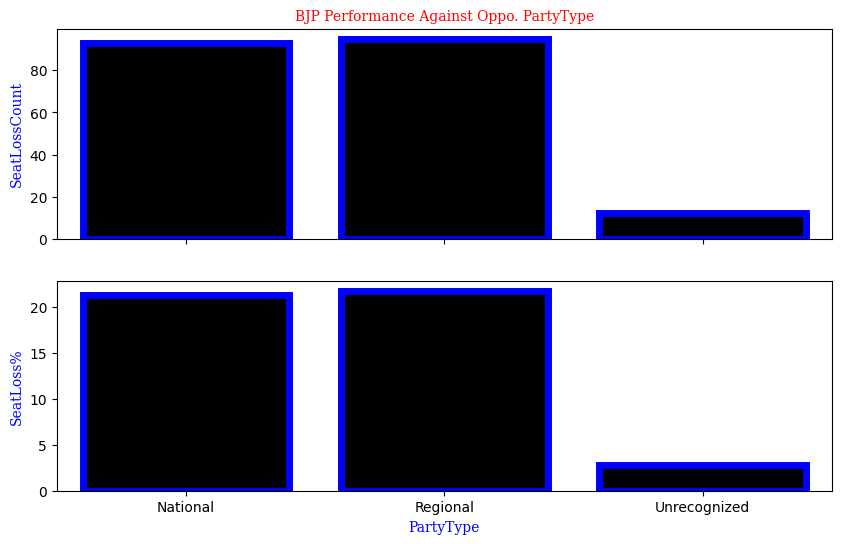

In [ ]:
df2 = t1.groupby('PartyType')['Party'].count().rename('BJPseatlosscount').reset_index()
df2['BJPseatloss%'] = round((df2['BJPseatlosscount']/437)*100,2)

fig,ax = plt.subplots(figsize=(10,6),nrows=2,ncols=1,sharex=True)
sns.barplot(data=df2,y='BJPseatlosscount',x='PartyType',ax=ax[0],color='black',edgecolor='blue',linewidth=5)
ax[0].set_ylabel('SeatLossCount',color='blue',font='serif')
ax[0].set_title('BJP Performance Against Oppo. PartyType',color='red',font='serif')

sns.barplot(data=df2,y='BJPseatloss%',x='PartyType',ax=ax[1],color='black',edgecolor='blue',linewidth=5)
ax[1].set_ylabel('SeatLoss%',color='blue',font='serif')
ax[1].set_xlabel('PartyType',color='blue',font='serif')

## BJP Performance Against Opposition Party Types

### Key Insights:
- **National Parties**: BJP lost ~91 seats (≈21% loss rate).
- **Regional Parties**: Losses almost equal to national parties (~92 seats, ≈22% loss rate).
- **Unrecognized Parties**: Minimal impact — only ~13 seat losses (~3% loss rate).

### Why it Matters:
- Losses are **evenly split between national & regional parties**.
- Shows **regional parties are as strong as national rivals** in challenging BJP, especially in their home states.


Text(0.5, 1.0, 'BJPlosscount In Each State Against Opp. PartyType')

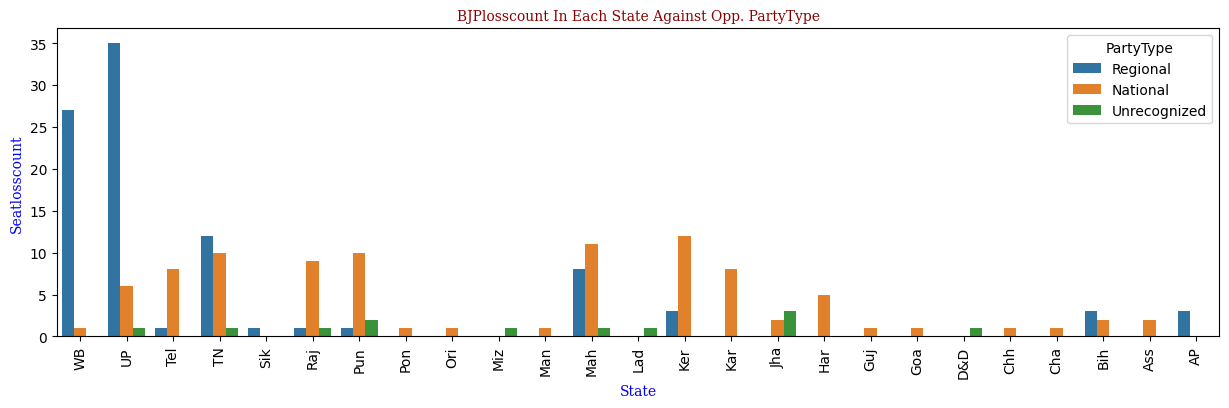

In [ ]:
temp_df1 = t1.groupby(['stateabr','PartyType'])['Party'].count().rename('BJPseatlosscount').reset_index().sort_values('stateabr',ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(data=temp_df1,x='stateabr',y='BJPseatlosscount',hue='PartyType')
plt.xticks(rotation=90)
plt.xlabel('State',color='blue',font='serif')
plt.ylabel('Seatlosscount',color='blue',font='serif')
plt.title('BJPlosscount In Each State Against Opp. PartyType',color='darkred',font='serif')

## BJP Seat Losses by Party Type Across States

### 🔍 Key Insights:

1. **West Bengal (WB)**:  
   - Highest BJP losses to **regional parties** (≈35 seats), mostly to TMC.  
   - Shows strong regional dominance.

2. **Uttar Pradesh (UP)**:  
   - Losses nearly balanced between **regional (≈27)** and **national parties (≈7)**.  
   - SP and INC major challengers.

3. **Tamil Nadu (TN)** & **Kerala (Ker)**:  
   - BJP lost significantly to **national parties**, mainly Congress & allies.

4. **Maharashtra (Mah)**:  
   - Strong **regional party challenge** (≈8 losses) with visible **national impact** too.

5. **States with Mixed Opposition**:  
   - **Bihar, Jharkhand, Assam, Telangana**: BJP lost to **both national & regional parties**, indicating a **fragmented opposition**.

6. **Minimal Impact from Unrecognized Parties**:  
   - Only a few states (Jha, TN, Mah) show losses to unrecognized parties.

---

### 🧠 Why It Matters:
- BJP’s major **losses are state-specific** and influenced by **strong regional players** in WB, UP, and Mah.
- **Opposition alliances and regional strength** vary by state — one-size-fits-all strategy won’t work.
- **Tailored campaigning** is needed to counter regional dominance and rebuild in key battlegrounds.



# ZONE WISE ANALYSIS

In [ ]:
zone_mapping = {
    'North': ['Jammu & Kashmir', 'Ladakh', 'Himachal Pradesh', 'Punjab', 'Haryana','Chandigarh', 'Delhi [1977 Onwards]', 'Uttarakhand', 'Uttar Pradesh [2000 Onwards]'],
    'West': ['Rajasthan', 'Gujarat', 'Maharashtra', 'Goa', 'Dadra & Nagar Haveli' , 'Daman & Diu'],
    'South': ['Andhra Pradesh [2014 Onwards]', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondicherry', 'Andaman & Nicobar Islands', 'Lakshadweep'],
    'East': ['Bihar [2000 Onwards]', 'Jharkhand', 'Orissa', 'West Bengal'],
    'Central': ['Madhya Pradesh [2000 Onwards]', 'Chhattisgarh'],
    'North East': ['Assam', 'Arunachal Pradesh', 'Meghalaya', 'Manipur', 'Mizoram', 'Nagaland', 'Tripura', 'Sikkim']
}

# Invert the mapping for easier lookup
state_to_zone = {}
for zone, states in zone_mapping.items():
    for state in states:
        state_to_zone[state] = zone

# Create the new 'Zone' column
election_res['Zone'] = election_res['State'].map(state_to_zone)


In [ ]:
temp = election_res[election_res['PC Name'].isin(bjpseat)]
t1 = temp.groupby('Zone')['Party'].count().rename('TotalCandidate').reset_index().sort_values('TotalCandidate',ascending=False)
t2 = temp[temp['Party']=='Bharatiya Janta Party'].groupby('Zone')['Party'].count().rename('WonCandidate').reset_index()
t3 = pd.merge(t1,t2,how='outer',on='Zone')
t3['Win%'] = round((t3['WonCandidate']/t3['TotalCandidate'])*100,2)
t4 = temp.groupby('Zone')['Turnout'].mean().rename('AvgTurnout').reset_index()
t5 = pd.merge(t3,t4,how='outer',on='Zone')
t6 = round((temp.groupby('Zone')['Margin'].mean()/100000),2).rename('AvgWinMargin(lakhs)').reset_index()
t7 = pd.merge(t5,t6,how='outer',on='Zone')
t8 = round((temp[temp['Party']!='Bharatiya Janta Party'].groupby('Zone')['Margin'].mean()/100000),2).rename('AvgLossMargin(lakhs)').reset_index()
t9 = pd.merge(t7,t8,how='outer',on='Zone')
t10 = temp[(temp['Party']!='Bharatiya Janta Party') & (temp['PartyType']=='Regional')].groupby('Zone')['Party'].count().rename('lossedseatvsRegionalParties').reset_index()
t11= pd.merge(t9,t10,how='outer',on='Zone').fillna(0)
t11['lossedseat%vsRegionalParties'] = round((t11['lossedseatvsRegionalParties']/(t11['TotalCandidate'] - t11['WonCandidate'])*100),2)
t12 = temp[(temp['Party']!='Bharatiya Janta Party') & (temp['PartyType']=='National')].groupby('Zone')['Party'].count().rename('lossedseatvsNationaParties').reset_index()
t13= pd.merge(t11,t12,how='outer',on='Zone').fillna(0)
t13['lossedseat%vsNationalParties'] = round((t13['lossedseatvsNationaParties']/(t13['TotalCandidate'] - t13['WonCandidate'])*100),2)
t13

,Zone,TotalCandidate,WonCandidate,Win%,AvgTurnout,AvgWinMargin(lakhs),AvgLossMargin(lakhs),lossedseatvsRegionalParties,lossedseat%vsRegionalParties,lossedseatvsNationaParties,lossedseat%vsNationalParties
0,Central,40,39,97.50,68.795000,2.93,0.43,0.0,0.00,1,100.00
1,East,91,52,57.14,72.098901,1.34,1.52,30.0,76.92,6,15.38
2,North,116,54,46.55,59.549138,1.04,0.87,36.0,58.06,22,35.48
3,North East,18,13,72.22,79.066667,2.19,1.23,1.0,20.00,3,60.00
4,South,89,30,33.71,70.941573,1.70,1.75,19.0,32.20,39,66.10
5,West,83,49,59.04,62.504819,1.89,0.82,9.0,26.47,22,64.71


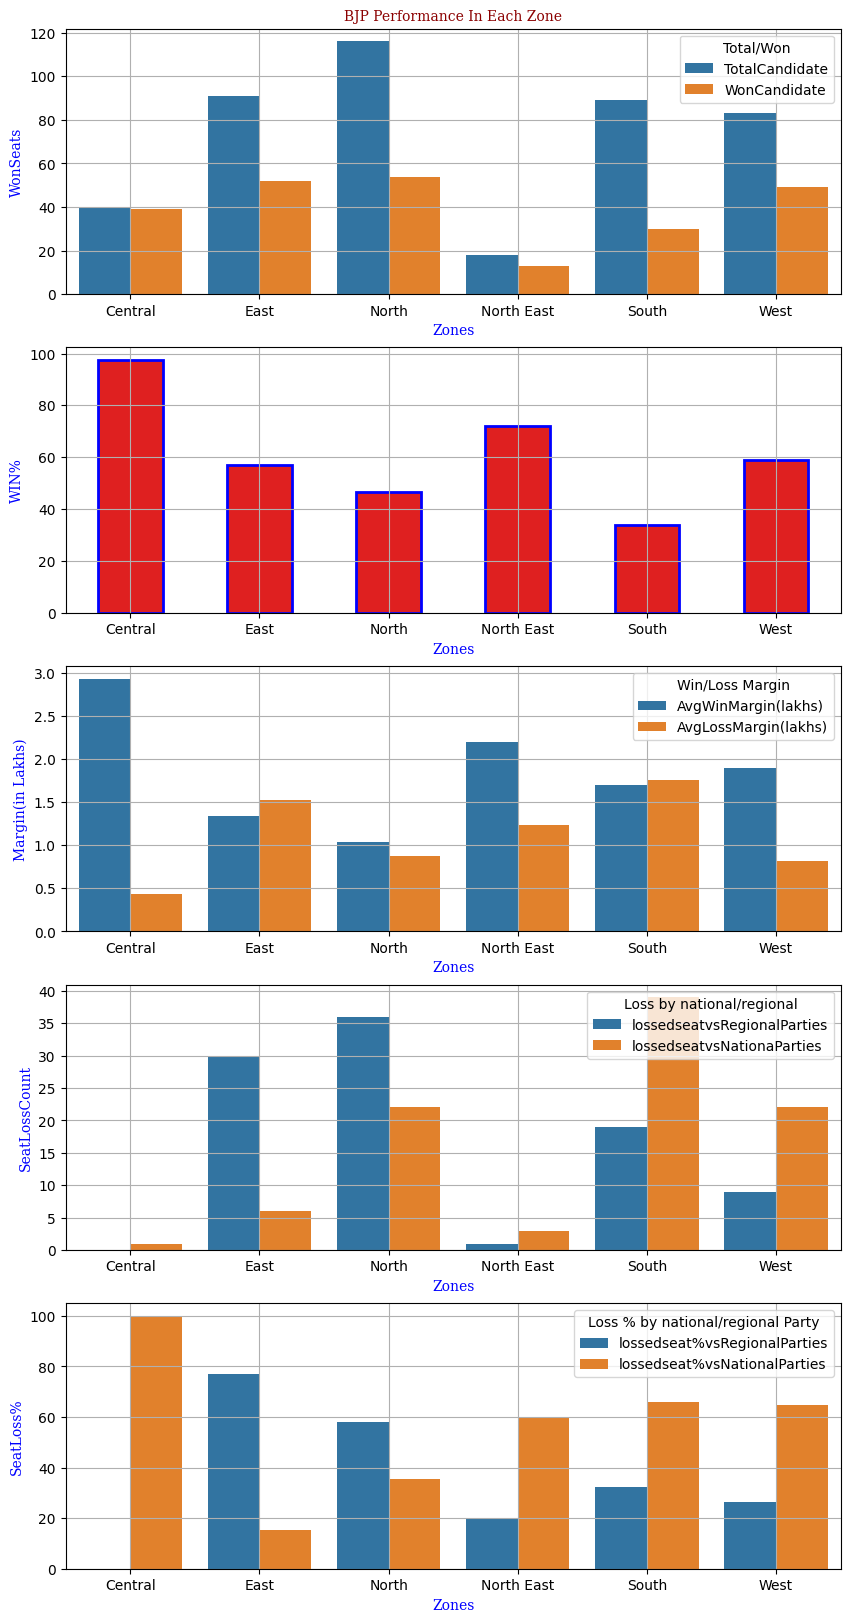

In [ ]:
fig,ax = plt.subplots(figsize=(10,20),nrows=5,ncols=1)
melt1 = t13.melt(id_vars='Zone',value_vars=['TotalCandidate','WonCandidate'],var_name='Total/Won',value_name='Count')
melt2 = t13.melt(id_vars='Zone',value_vars=['AvgWinMargin(lakhs)','AvgLossMargin(lakhs)'],var_name='Win/Loss Margin',value_name='Margin')
melt3 = t13.melt(id_vars='Zone',value_vars=['lossedseatvsRegionalParties','lossedseatvsNationaParties'],var_name='Loss by national/regional',value_name='count')
melt4 = t13.melt(id_vars='Zone',value_vars=['lossedseat%vsRegionalParties','lossedseat%vsNationalParties'],var_name='Loss % by national/regional Party',value_name='loss%')


sns.barplot(data=melt1,x='Zone',y='Count',hue='Total/Won',ax=ax[0])
ax[0].set_ylabel('WonSeats',color='blue',font='serif')
ax[0].set_xlabel('Zones',color='blue',font='serif')
ax[0].set_title('BJP Performance In Each Zone',color='darkred',font='serif')
ax[0].grid()

sns.barplot(data=t13,x='Zone',y='Win%',ax=ax[1],width=0.5,color='red',edgecolor='blue',linewidth=2)
ax[1].set_ylabel('WIN%',color='blue',font='serif')
ax[1].set_xlabel('Zones',color='blue',font='serif')
ax[1].grid()
# ax[1].set_title('BJP Performance In Each Zone',color='darkred',font='serif')

sns.barplot(data=melt2,x='Zone',y='Margin',ax=ax[2],hue='Win/Loss Margin')
ax[2].set_ylabel('Margin(in Lakhs)',color='blue',font='serif')
ax[2].set_xlabel('Zones',color='blue',font='serif')
ax[2].grid()

sns.barplot(data=melt3,x='Zone',y='count',ax=ax[3],hue='Loss by national/regional')
ax[3].set_ylabel('SeatLossCount',color='blue',font='serif')
ax[3].set_xlabel('Zones',color='blue',font='serif')
ax[3].grid()

sns.barplot(data=melt4,x='Zone',y='loss%',ax=ax[4],hue='Loss % by national/regional Party')
ax[4].set_ylabel('SeatLoss%',color='blue',font='serif')
ax[4].set_xlabel('Zones',color='blue',font='serif')
ax[4].grid()

## 🗺️ BJP Zone-wise Performance – Lok Sabha 2024

### 🧮 1. Total Candidates vs Wins
- **Strong zones**: North, East, and West – highest number of candidates and wins.
- **Weak zones**: North East and South – fewer wins despite significant participation.

---

### 📈 2. Win Percentage by Zone
- **Highest win rate**: Central (nearly 100%) → BJP stronghold.
- **Lowest win rate**: South (≈35%) → Weak zone, needs strategic improvement.
- **Moderate win rate**: East, North East, and West (~45–70%).

---

### 🧾 3. Win vs Loss Margins
- **Biggest victory margins**: Central (≈3 lakh avg.) → Strong voter support.
- **High loss margins**: East and South → Indicates solid opposition base.
- **Close contests**: North and North East → Swing potential with small vote shifts.

---

### 📉 4. Seat Loss Count – Regional vs National
- **North & East**: Most losses to **regional parties**.
- **South & West**: Balanced but many losses to **national parties** like INC.
- **Central & NE**: Minimal losses.

---

### 📊 5. Loss % by Party Type
- **Central**: 100% losses to national parties – opposition is mainly Congress.
- **South & West**: Around 65% losses to national parties – Congress/DMK/TDP strong.
- **North**: Nearly 60% losses to regional parties – SP, RJD, etc.
- **East**: ~75% losses to regional parties – TMC, JMM.

---

### 🎯 Key Takeaways:
1. BJP’s **core strength lies in Central and North India**.
2. **South, West, and parts of East** show strong **national and regional party opposition**.
3. **Target zones for improvement**:
   - **North East & South**: More ground work, candidate selection, and alliance strategies.
   - **Close margin zones**: Focused campaigning can flip results.

